<a href="https://colab.research.google.com/github/swe196/6220/blob/main/Heart_failure_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.7/169.7 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 73.4 MB/s eta 0:00:00
   ━━━━━

In [ ]:
from pycaret.utils import version
version()

'3.3.2'

In [ ]:
!pip install pycaret[analysis]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 36.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of dash-bootstrap-components to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.9/287.9 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.8/535.8 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 95.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import normaltest, anderson
import scipy
from warnings import filterwarnings

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict, cross_validate
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, RobustScaler
from xgboost import XGBRFClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import RocCurveDisplay, confusion_matrix, roc_auc_score, classification_report, accuracy_score, f1_score
from sklearn.metrics import recall_score, precision_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector
import xgboost
from sklearn.decomposition import PCA


In [ ]:
sns.set(style='whitegrid')
pd.set_option('display.max_colwidth', 300)
pd.set_option('display.max_rows', 10000)
filterwarnings('ignore')
pd.plotting.register_matplotlib_converters()
%matplotlib inline
print("Setup Complete")

Setup Complete


In [ ]:
cvd = pd.read_csv('/heart_failure_clinical_records_dataset.csv')

In [ ]:
cvd.tail()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
294                    1   155000.0               1.1           143    1   
295                    0   270000.0               1.2           139    0   
296                    0   742000.0               0.8           138    0   
297                    0   140000.0               1.4           140    1   
298                    0   395000.0               1.6           136    1   

     smoking  time  DEATH_EVENT  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0

In [ ]:
cvd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
no_bool_cols = ['creatinine_phosphokinase', 'platelets', 'ejection_fraction', 'serum_sodium',
        'serum_creatinine', 'time', 'age']

In [ ]:
#we describe only not categorical attribute.
cvd[no_bool_cols].describe()

creatinine_phosphokinase      platelets  ejection_fraction  \
count                299.000000     299.000000         299.000000   
mean                 581.839465  263358.029264          38.083612   
std                  970.287881   97804.236869          11.834841   
min                   23.000000   25100.000000          14.000000   
25%                  116.500000  212500.000000          30.000000   
50%                  250.000000  262000.000000          38.000000   
75%                  582.000000  303500.000000          45.000000   
max                 7861.000000  850000.000000          80.000000   

       serum_sodium  serum_creatinine        time         age  
count    299.000000         299.00000  299.000000  299.000000  
mean     136.625418           1.39388  130.260870   60.833893  
std        4.412477           1.03451   77.614208   11.894809  
min      113.000000           0.50000    4.000000   40.000000  
25%      134.000000           0.90000   73.000000   51.000000  
50%      137.000000           1.10000  115.000000   60.000000  
75%      140.000000           1.40000  203.000000   70.000000  
max      148.000000           9.40000  285.000000   95.000000

In [ ]:
cvd[no_bool_cols].mode()

creatinine_phosphokinase  platelets  ejection_fraction  serum_sodium  \
0                     582.0  263358.03               35.0         136.0   
1                       NaN        NaN                NaN           NaN   

   serum_creatinine  time   age  
0               1.0   187  60.0  
1               NaN   250   NaN

In [ ]:
cvd[no_bool_cols].corr()

creatinine_phosphokinase  platelets  \
creatinine_phosphokinase                  1.000000   0.024463   
platelets                                 0.024463   1.000000   
ejection_fraction                        -0.044080   0.072177   
serum_sodium                              0.059550   0.062125   
serum_creatinine                         -0.016408  -0.041198   
time                                     -0.009346   0.010514   
age                                      -0.081584  -0.052354   

                          ejection_fraction  serum_sodium  serum_creatinine  \
creatinine_phosphokinase          -0.044080      0.059550         -0.016408   
platelets                          0.072177      0.062125         -0.041198   
ejection_fraction                  1.000000      0.175902         -0.011302   
serum_sodium                       0.175902      1.000000         -0.189095   
serum_creatinine                  -0.011302     -0.189095          1.000000   
time                               0.041729      0.087640         -0.149315   
age                                0.060098     -0.045966          0.159187   

                              time       age  
creatinine_phosphokinase -0.009346 -0.081584  
platelets                 0.010514 -0.052354  
ejection_fraction         0.041729  0.060098  
serum_sodium              0.087640 -0.045966  
serum_creatinine         -0.149315  0.159187  
time                      1.000000 -0.224068  
age                      -0.224068  1.000000

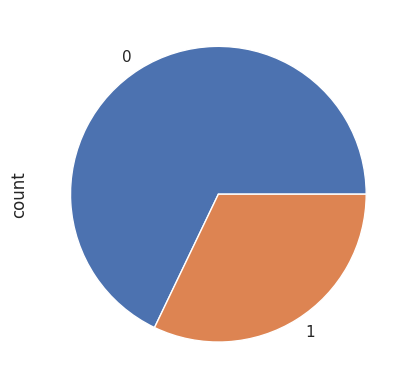

In [ ]:
cvd['DEATH_EVENT'].value_counts().plot(kind='pie')
plt.show()

In [ ]:
(cvd['DEATH_EVENT'].value_counts()/sum(cvd['DEATH_EVENT'].value_counts()))*100

DEATH_EVENT
0    67.892977
1    32.107023
Name: count, dtype: float64

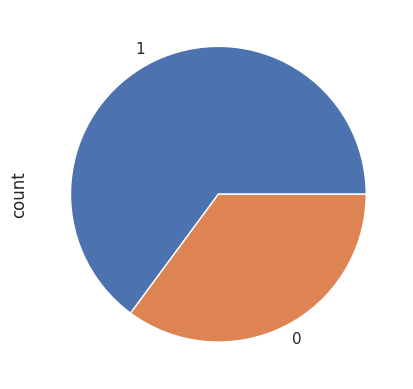

In [ ]:
cvd['sex'].value_counts().plot(kind='pie')
plt.show()

In [ ]:
(cvd['sex'].value_counts()/sum(cvd['sex'].value_counts()))*100

sex
1    64.882943
0    35.117057
Name: count, dtype: float64

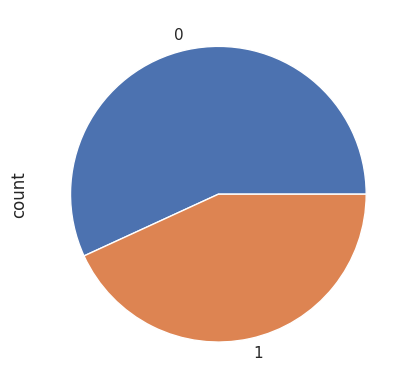

In [ ]:
cvd['anaemia'].value_counts().plot(kind='pie')
plt.show()

In [ ]:
(cvd['anaemia'].value_counts()/sum(cvd['anaemia'].value_counts()))*100

anaemia
0    56.856187
1    43.143813
Name: count, dtype: float64

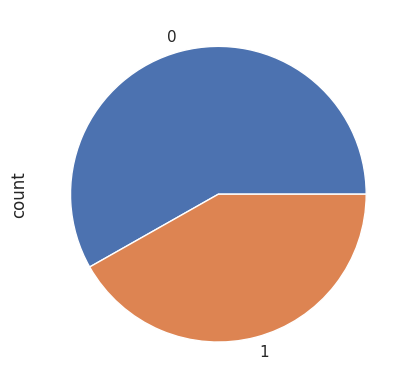

In [ ]:
cvd['diabetes'].value_counts().plot(kind='pie')
plt.show()

In [ ]:
(cvd['diabetes'].value_counts()/sum(cvd['diabetes'].value_counts()))*100

diabetes
0    58.19398
1    41.80602
Name: count, dtype: float64

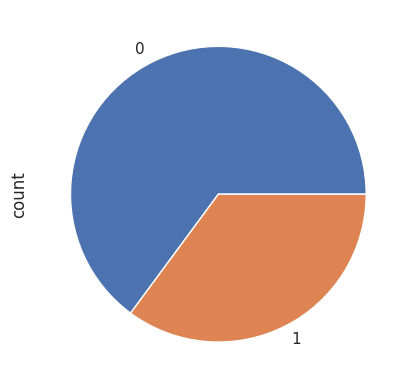

In [ ]:
cvd['high_blood_pressure'].value_counts().plot(kind='pie')
plt.show()

In [ ]:
(cvd['high_blood_pressure'].value_counts()/sum(cvd['high_blood_pressure'].value_counts()))*100

high_blood_pressure
0    64.882943
1    35.117057
Name: count, dtype: float64

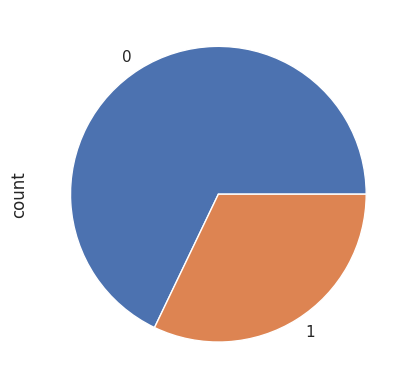

In [ ]:
cvd['smoking'].value_counts().plot(kind='pie')
plt.show()

In [ ]:
(cvd['smoking'].value_counts()/sum(cvd['smoking'].value_counts()))*100

smoking
0    67.892977
1    32.107023
Name: count, dtype: float64

In [ ]:
cvd[no_bool_cols].skew()

creatinine_phosphokinase    4.463110
platelets                   1.462321
ejection_fraction           0.555383
serum_sodium               -1.048136
serum_creatinine            4.455996
time                        0.127803
age                         0.423062
dtype: float64

In [ ]:
cvd[no_bool_cols].kurtosis()

creatinine_phosphokinase    25.149046
platelets                    6.209255
ejection_fraction            0.041409
serum_sodium                 4.119712
serum_creatinine            25.828239
time                        -1.212048
age                         -0.184871
dtype: float64

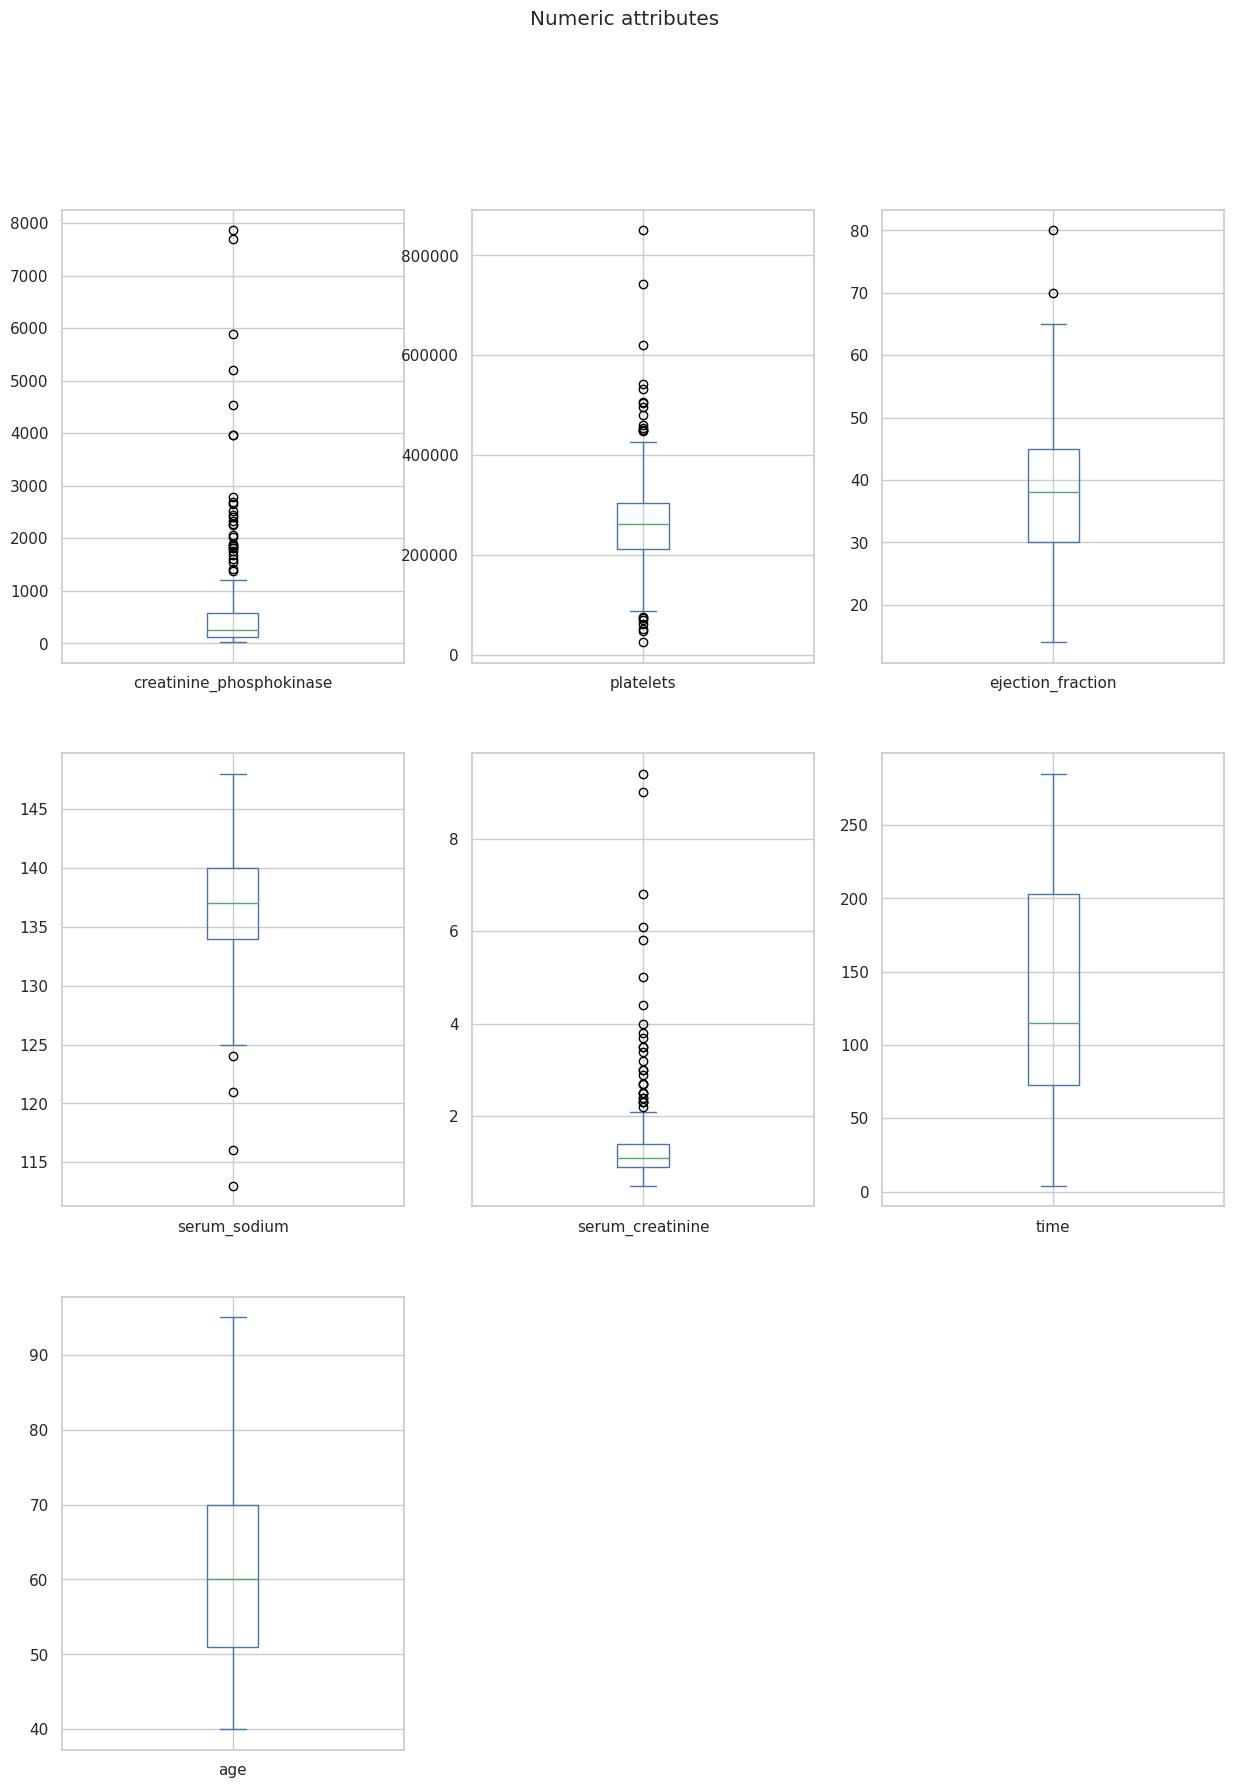

In [ ]:
cvd[no_bool_cols].plot(kind='box', subplots=True, layout=(3,3), figsize=(15,20), title='Numeric attributes')
plt.show()

In [ ]:
def  multibarplot(column=None):
    figu = plt.figure(figsize=(20,15))
    figu.subplots_adjust(wspace=0.2, hspace=0.2)
    cat = ['high_blood_pressure', 'diabetes', 'sex', 'anaemia','smoking']
    for i, u in enumerate(cat):
        ax = figu.add_subplot(2,3,i+1)
        sns.barplot(hue=cat[i], y=column, data=cvd, x="DEATH_EVENT", ax=ax)
        ax.set_title(f'Cardiovasc. disease:  {column}-death_event/{cat[i]}.')
    plt.show()

def  multiboxplot(column=None):
    figu = plt.figure(figsize=(20,15))
    figu.subplots_adjust(wspace=0.2, hspace=0.2)
    cat = ['high_blood_pressure', 'diabetes', 'sex', 'anaemia','smoking']
    for i, u in enumerate(cat):
        ax = figu.add_subplot(2,3,i+1)
        sns.boxplot(hue=cat[i], y=column, data=cvd, x="DEATH_EVENT", ax=ax)
        ax.set_title(f'Cardiovasc. disease:  {column}-death_event/{cat[i]}.')
    plt.show()

def multi2Dhistogram(column=None):
    fig= plt.figure(figsize=(15,10))
    fig.subplots_adjust(wspace=0.2, hspace=0.2)
    cols = ['creatinine_phosphokinase', 'platelets', 'ejection_fraction', 'serum_sodium',
        'serum_creatinine', 'time', 'age']
    cols = list(set(cols) - set([column]))
    for i, u in enumerate(cols):
        ax = fig.add_subplot(2,3, i+1)
        sns.histplot(x=column, y=u, data=cvd, hue='DEATH_EVENT', ax=ax, bins=10, stat='density')
        ax.set_title(f'Histogram: {column}-{u}.')
    plt.show()

def histogram_attribute():
    fig= plt.figure(figsize=(20,20))
    fig.subplots_adjust(wspace=0.2, hspace=0.2)
    cols = ['creatinine_phosphokinase', 'platelets', 'ejection_fraction', 'serum_sodium',
        'serum_creatinine', 'time', 'age']

    for i, u in enumerate(cols):
        ax = fig.add_subplot(3,3, i+1)
        sns.histplot(x=u, data=cvd, hue='DEATH_EVENT', ax=ax, bins=10, kde=True)
        ax.set_title(f'Histogram: {u}.')
    plt.show()

def countplot(cols=None):
    fig= plt.figure(figsize=(20,20))
    fig.subplots_adjust(wspace=0.2, hspace=0.2)
    for i, u in enumerate(cols):
        ax = fig.add_subplot(2,3, i+1)
        sns.countplot(x=u, data=cvd, hue='DEATH_EVENT', ax=ax)
        ax.set_title(f'Countplot: {u}.')
    plt.show()

def barplot_attribute():
    fig= plt.figure(figsize=(20,20))
    fig.subplots_adjust(wspace=0.2, hspace=0.2)
    cols = ['creatinine_phosphokinase', 'platelets', 'ejection_fraction', 'serum_sodium',
        'serum_creatinine', 'time', 'age']

    for i, u in enumerate(cols):
        ax = fig.add_subplot(3,3, i+1)
        sns.barplot(y=u, data=cvd, x='DEATH_EVENT', ax=ax)
        ax.set_title(f'Barplot: {u}.')
    plt.show()

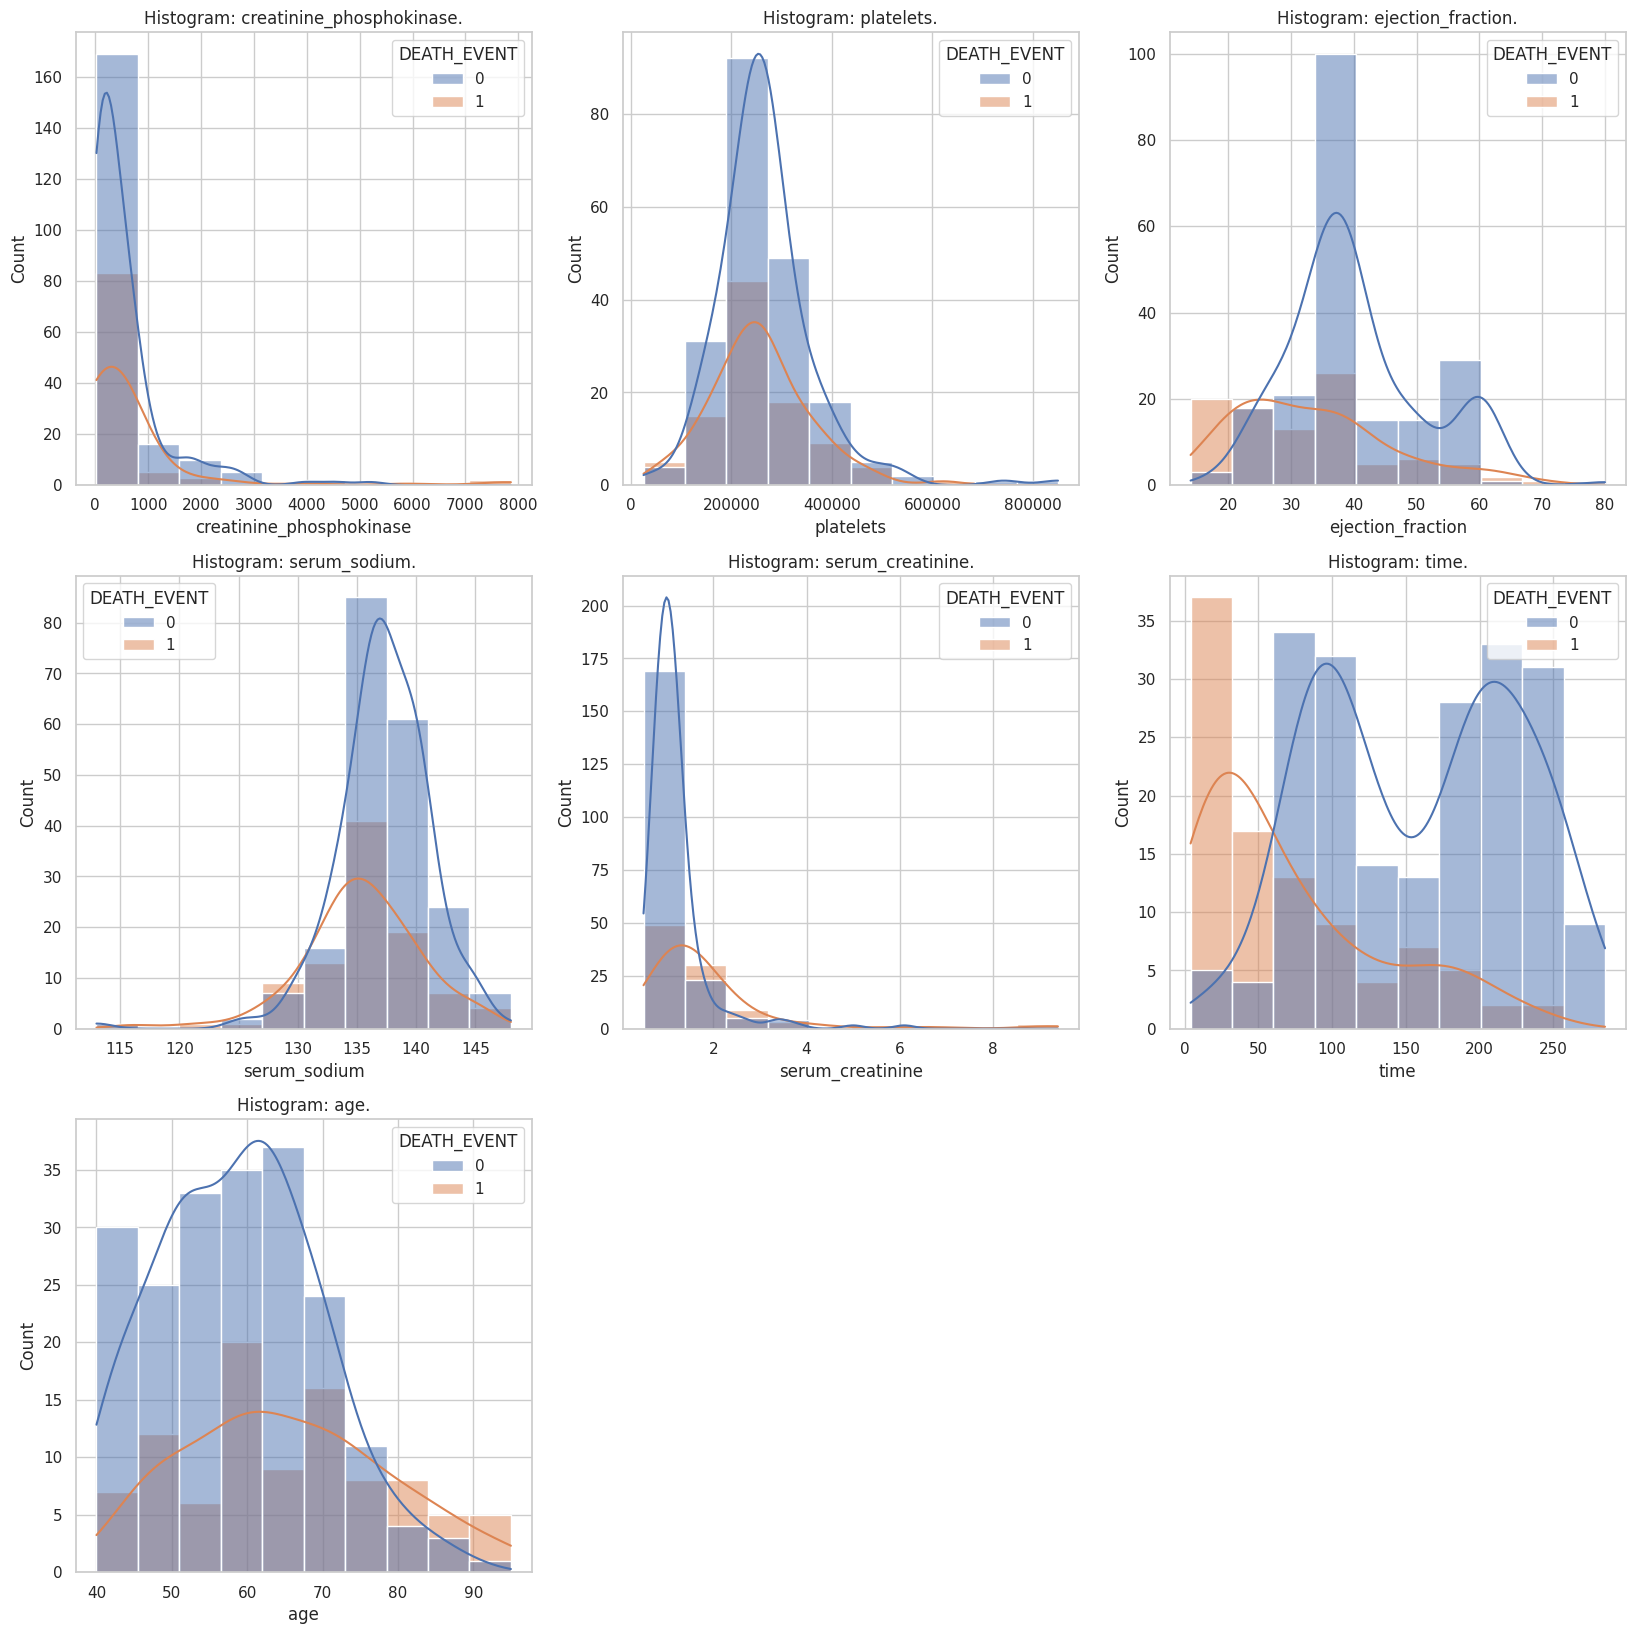

In [ ]:
histogram_attribute()

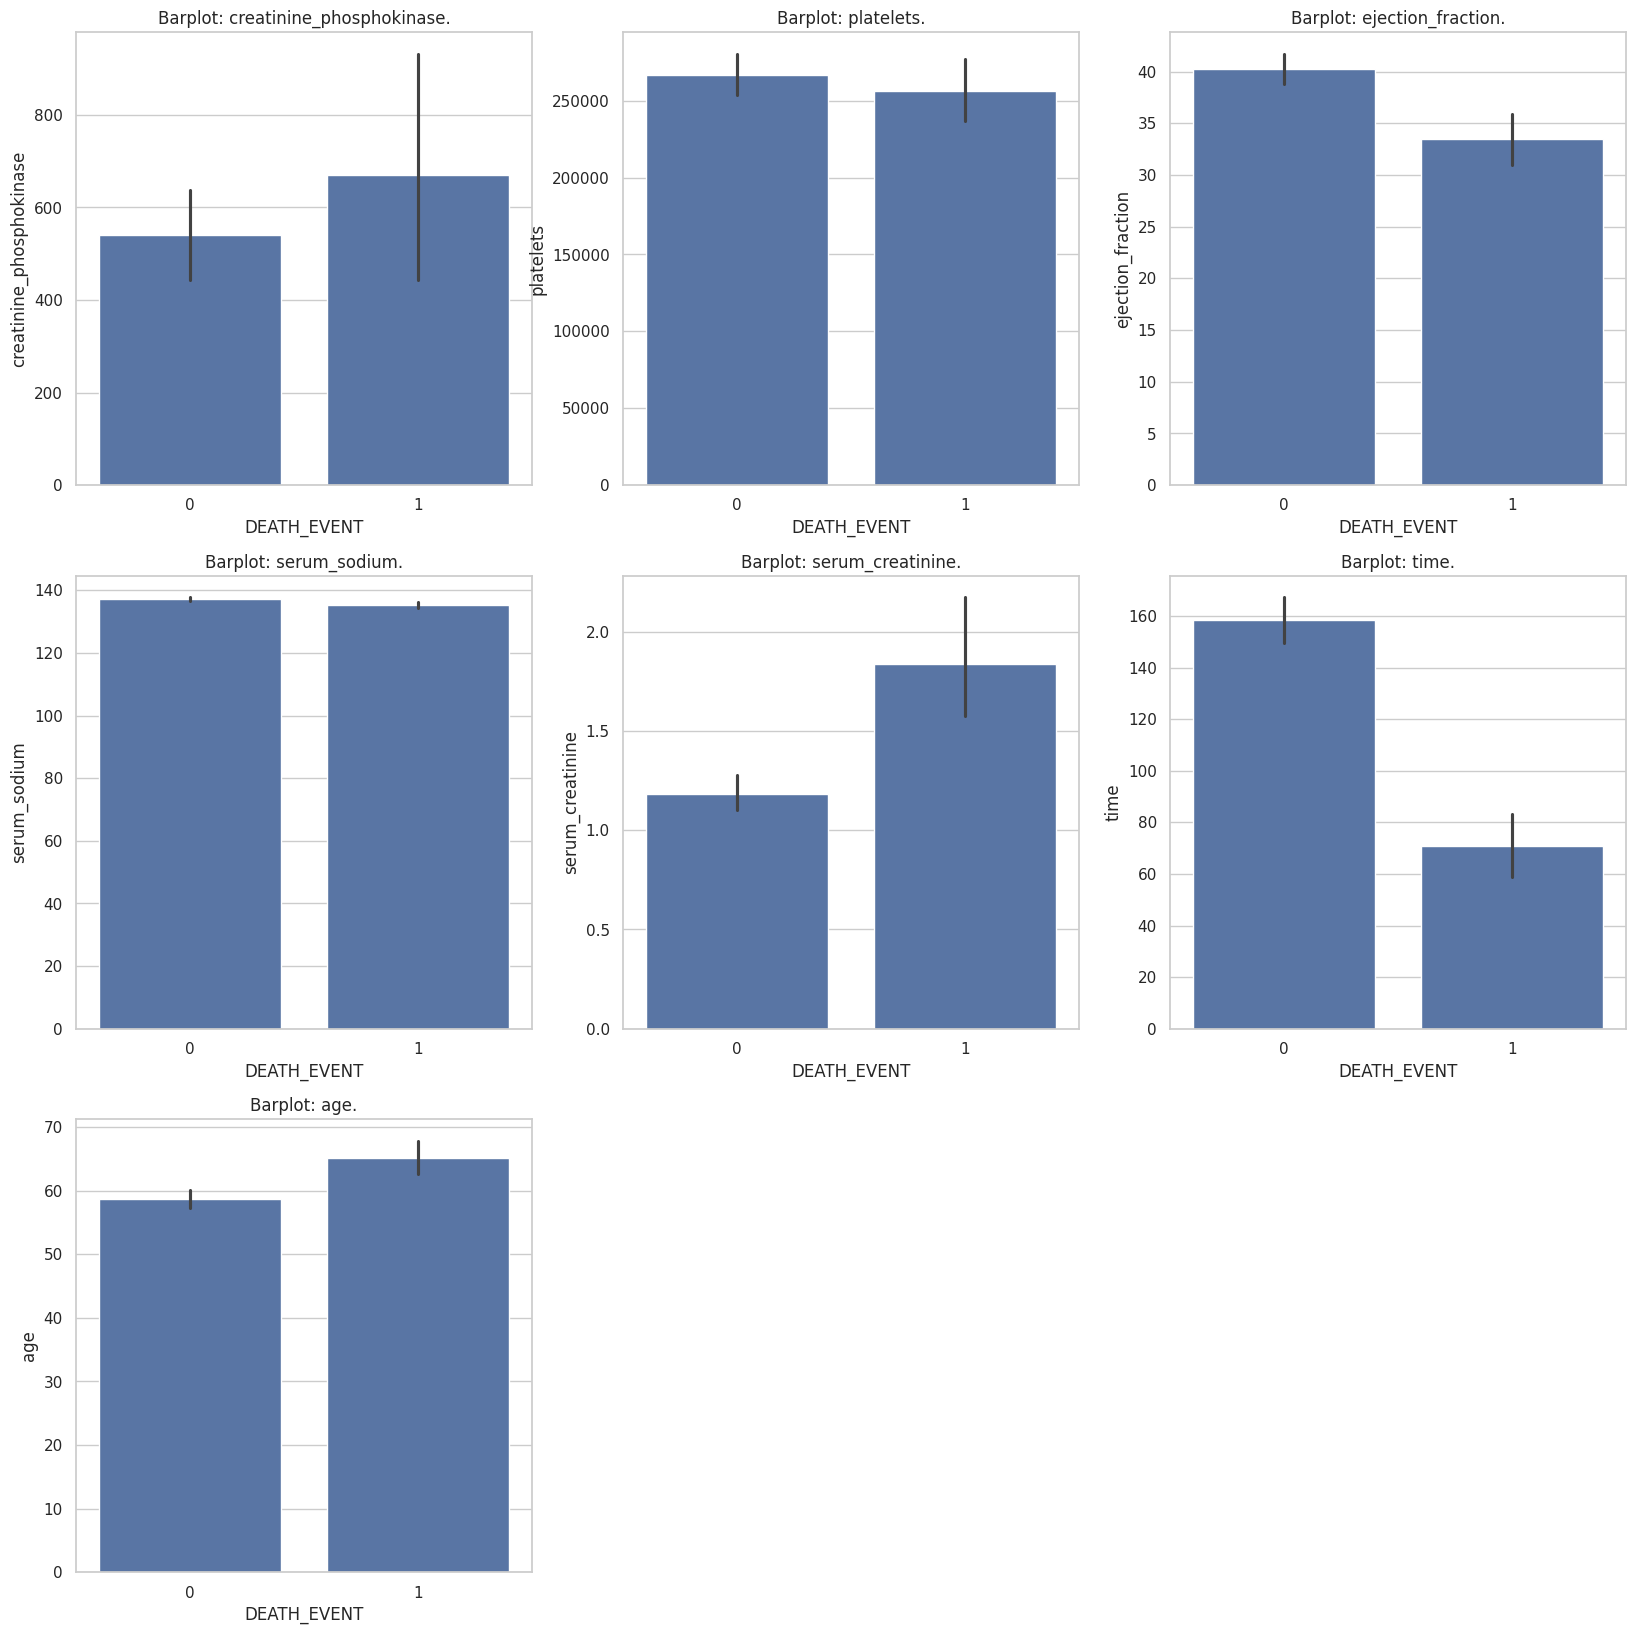

In [ ]:
barplot_attribute()

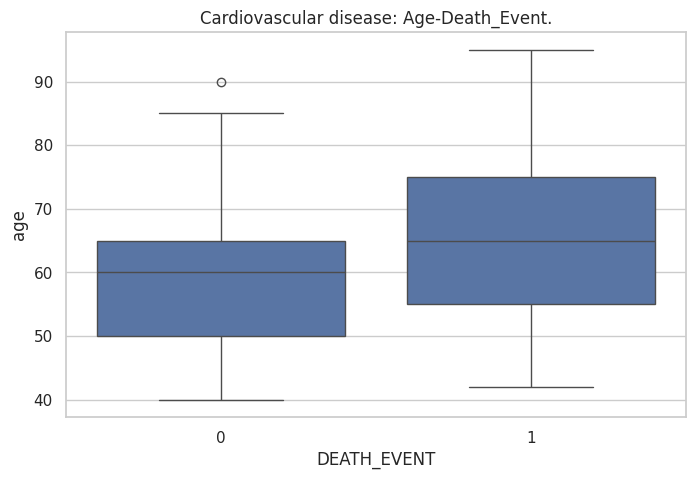

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="DEATH_EVENT", y="age", data=cvd)
plt.title('Cardiovascular disease: Age-Death_Event.')
plt.show()

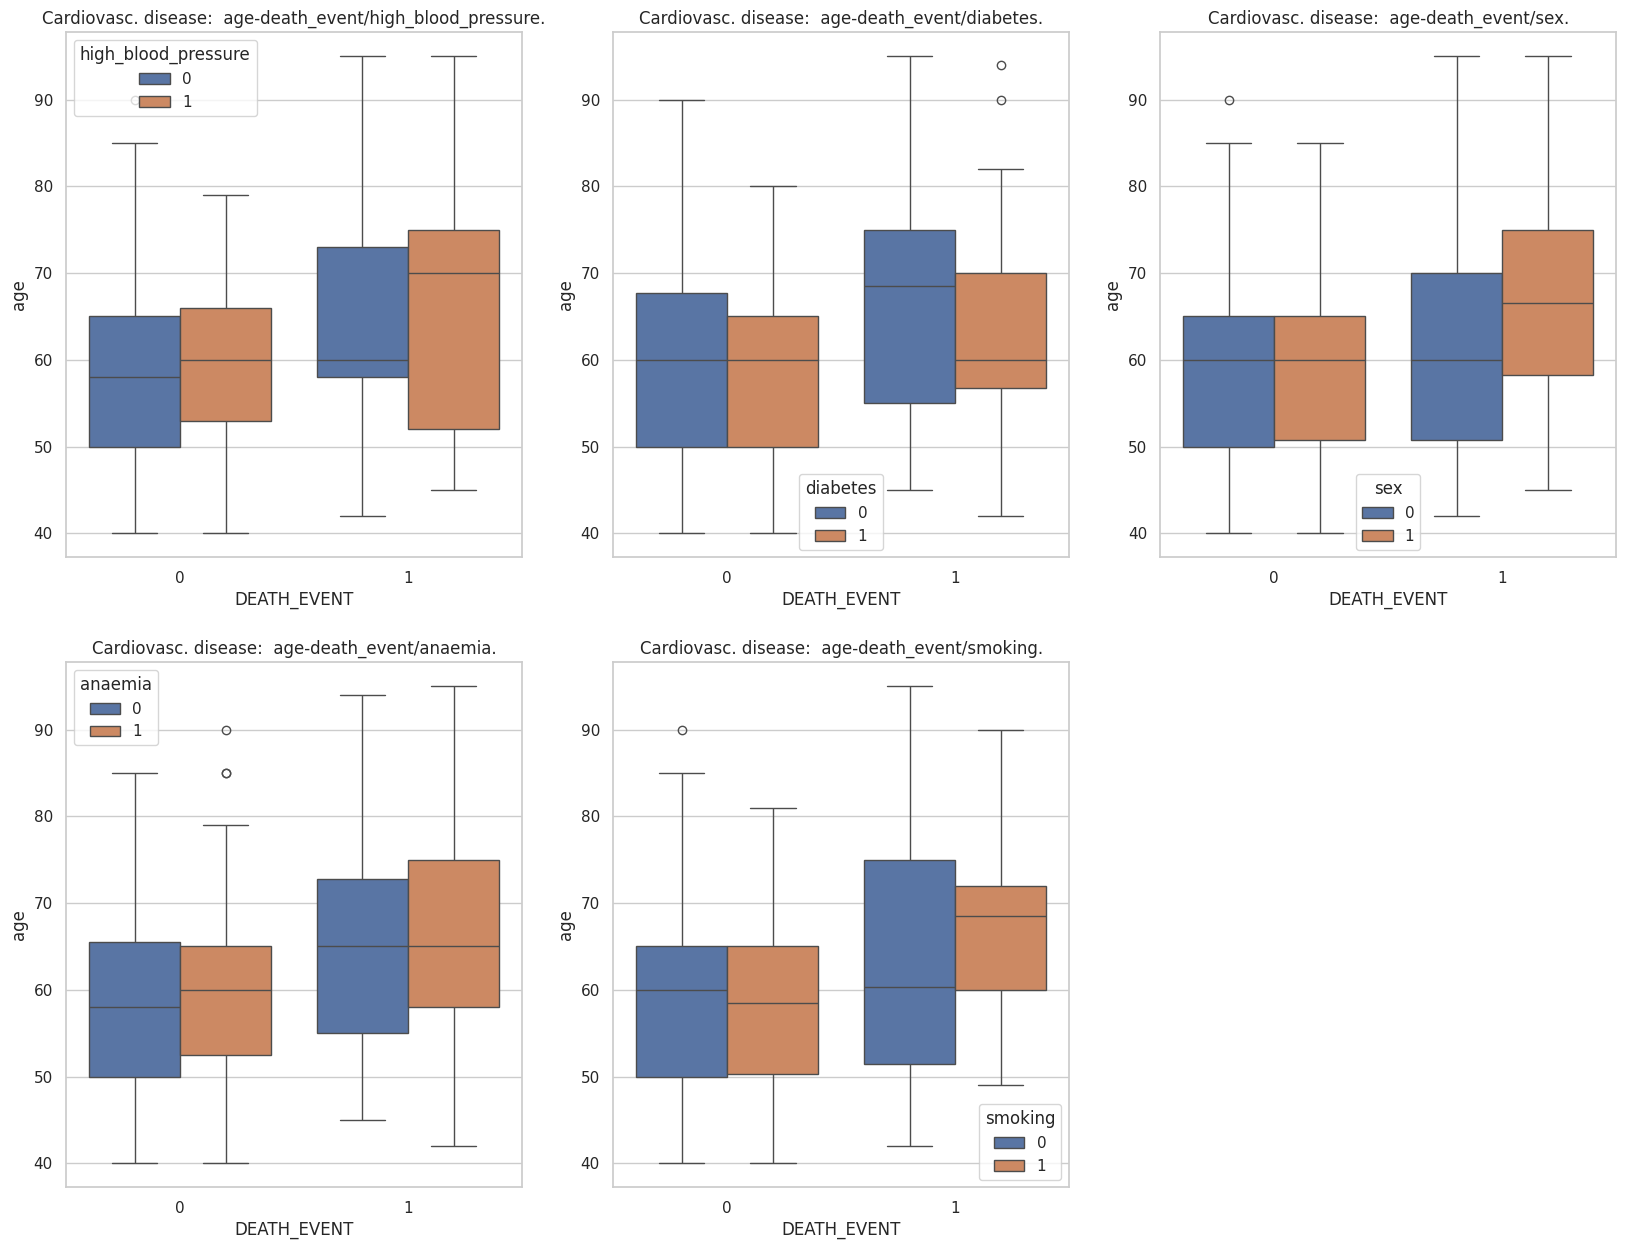

In [ ]:
multiboxplot('age')

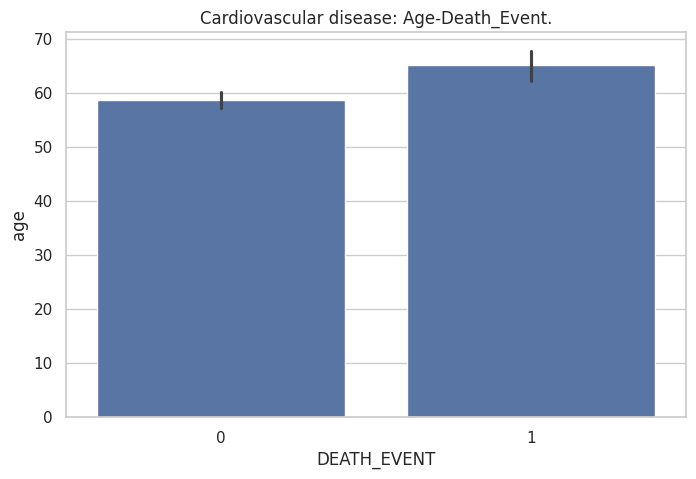

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(y="age", data=cvd, x="DEATH_EVENT")
plt.title('Cardiovascular disease: Age-Death_Event.')
plt.show()

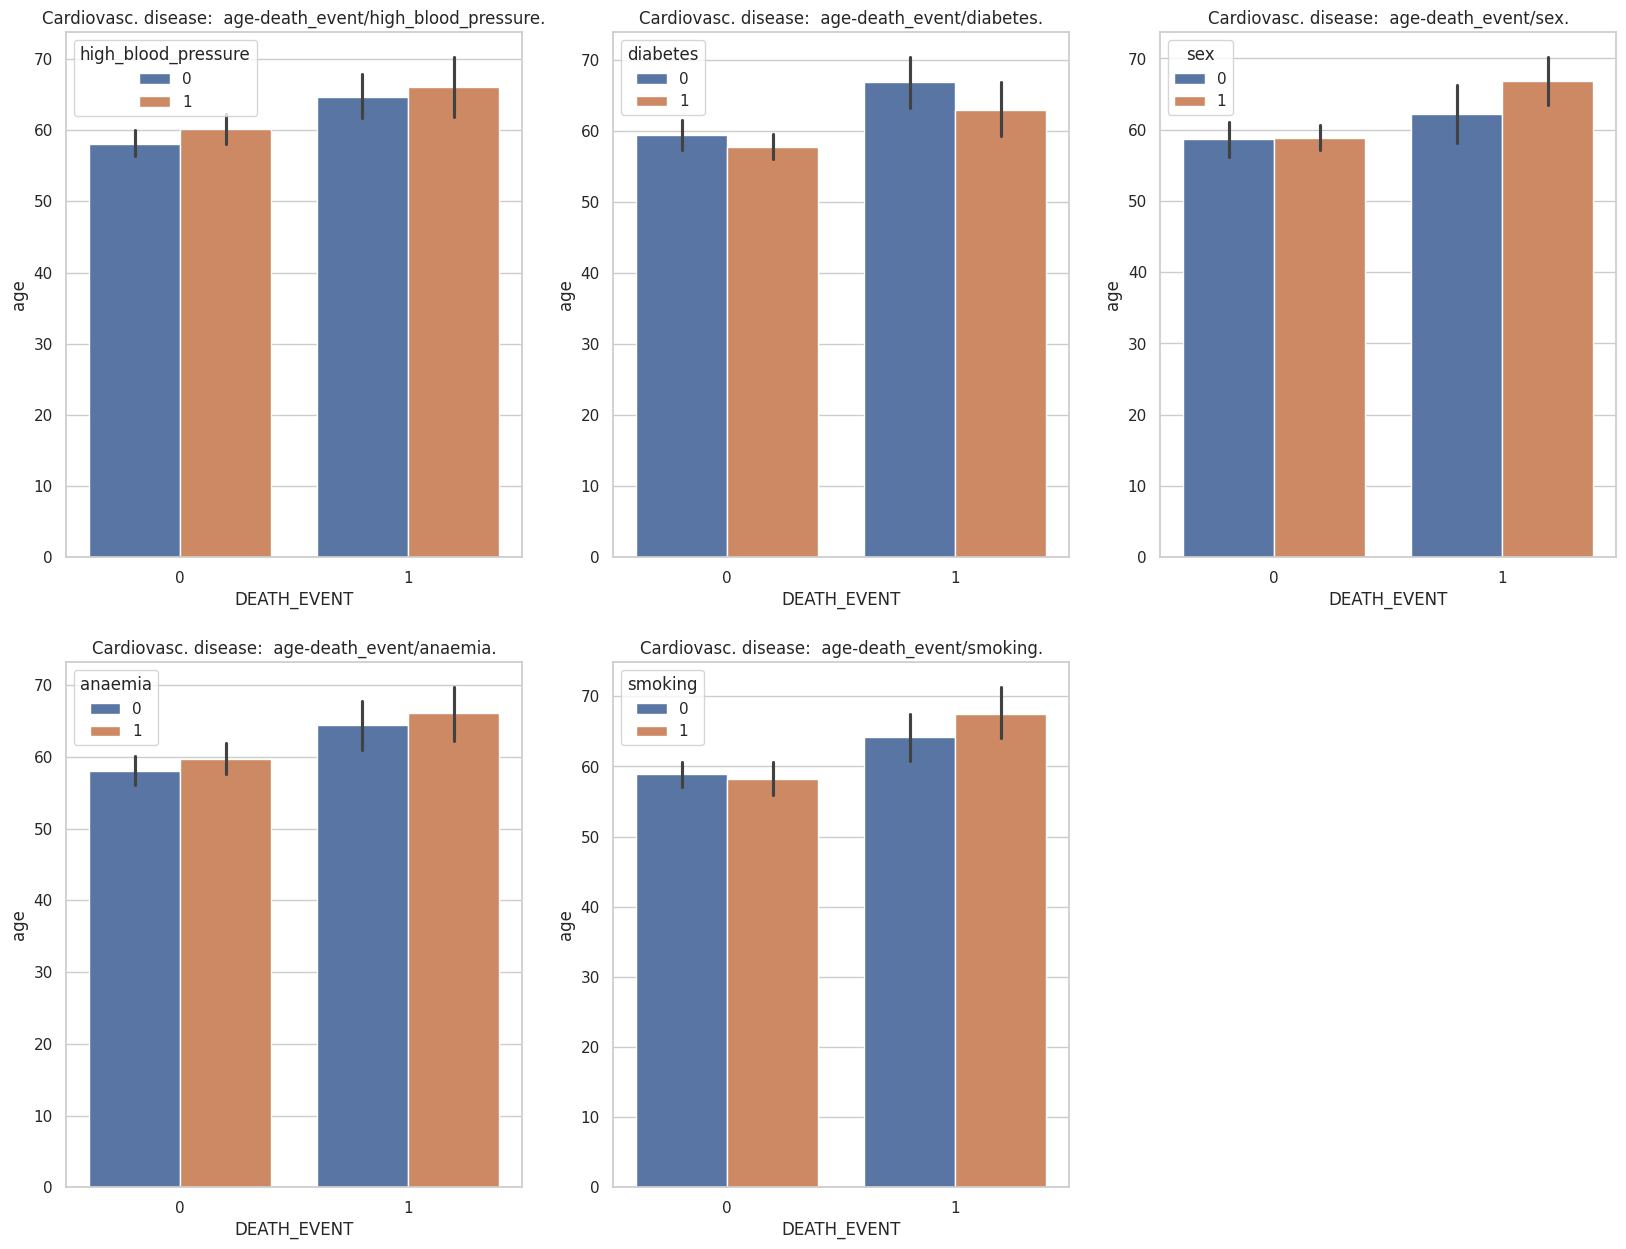

In [ ]:
multibarplot('age')

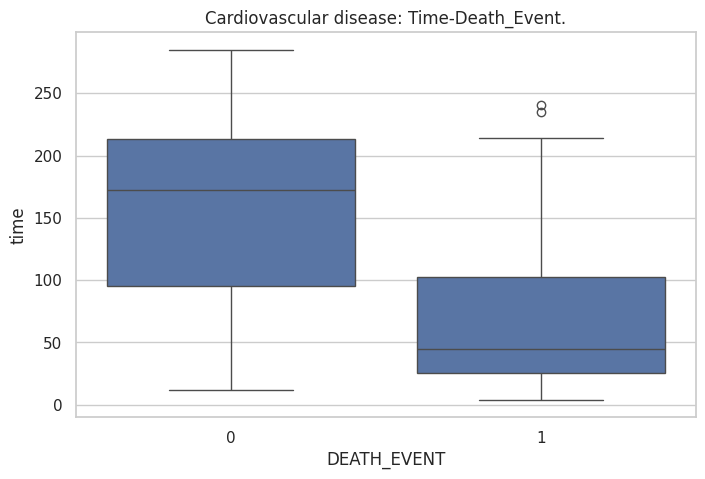

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="DEATH_EVENT", y="time", data=cvd)
plt.title('Cardiovascular disease: Time-Death_Event.')
plt.show()

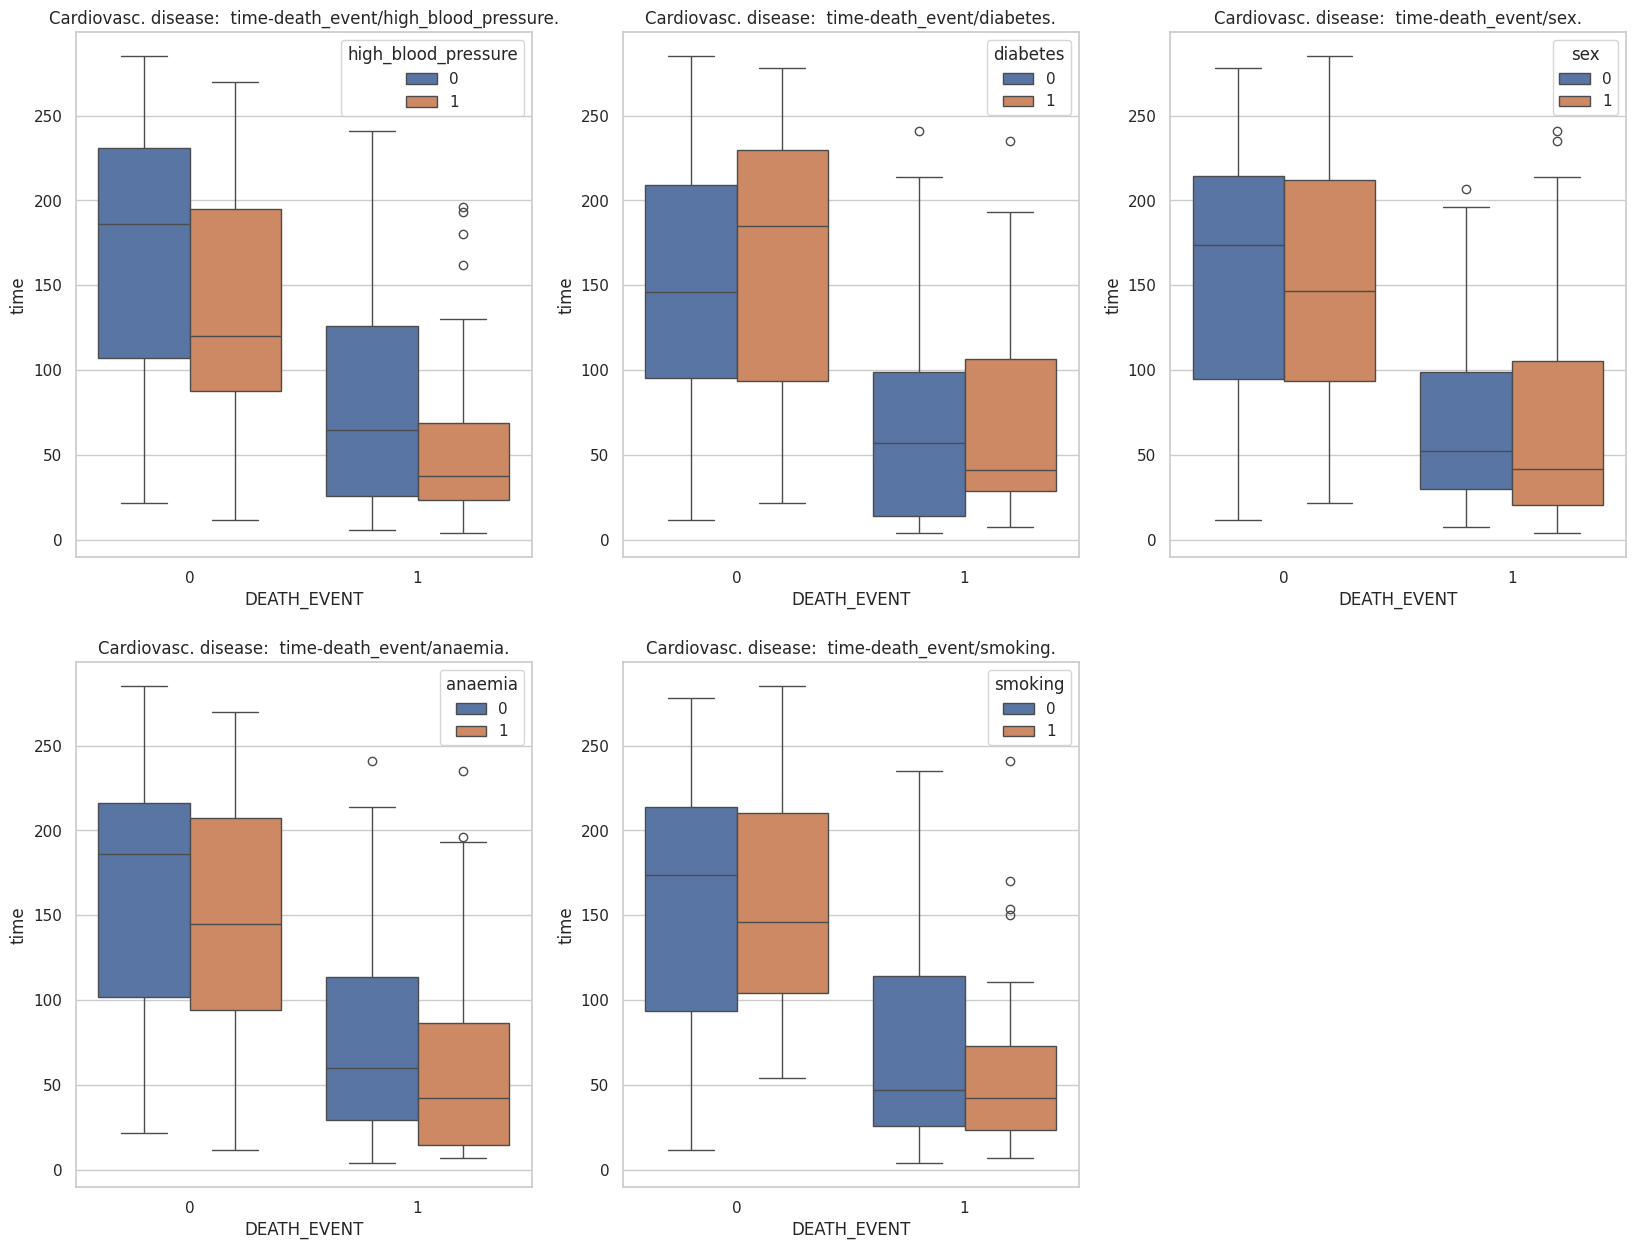

In [ ]:
multiboxplot(column='time')

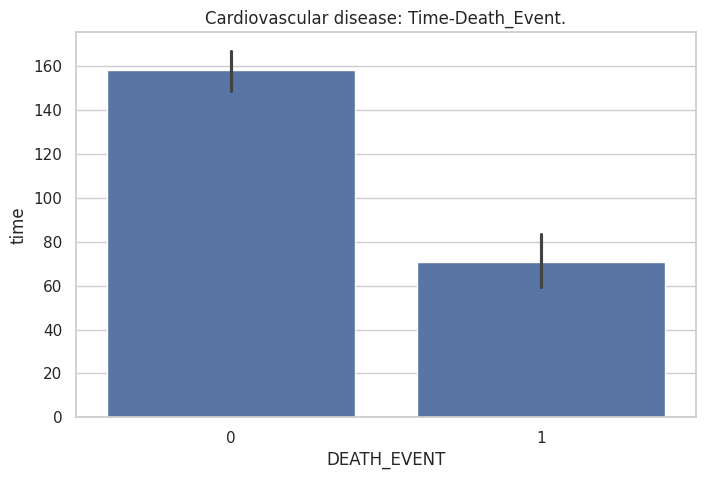

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(y="time", data=cvd, x="DEATH_EVENT")
plt.title('Cardiovascular disease: Time-Death_Event.')
plt.show()

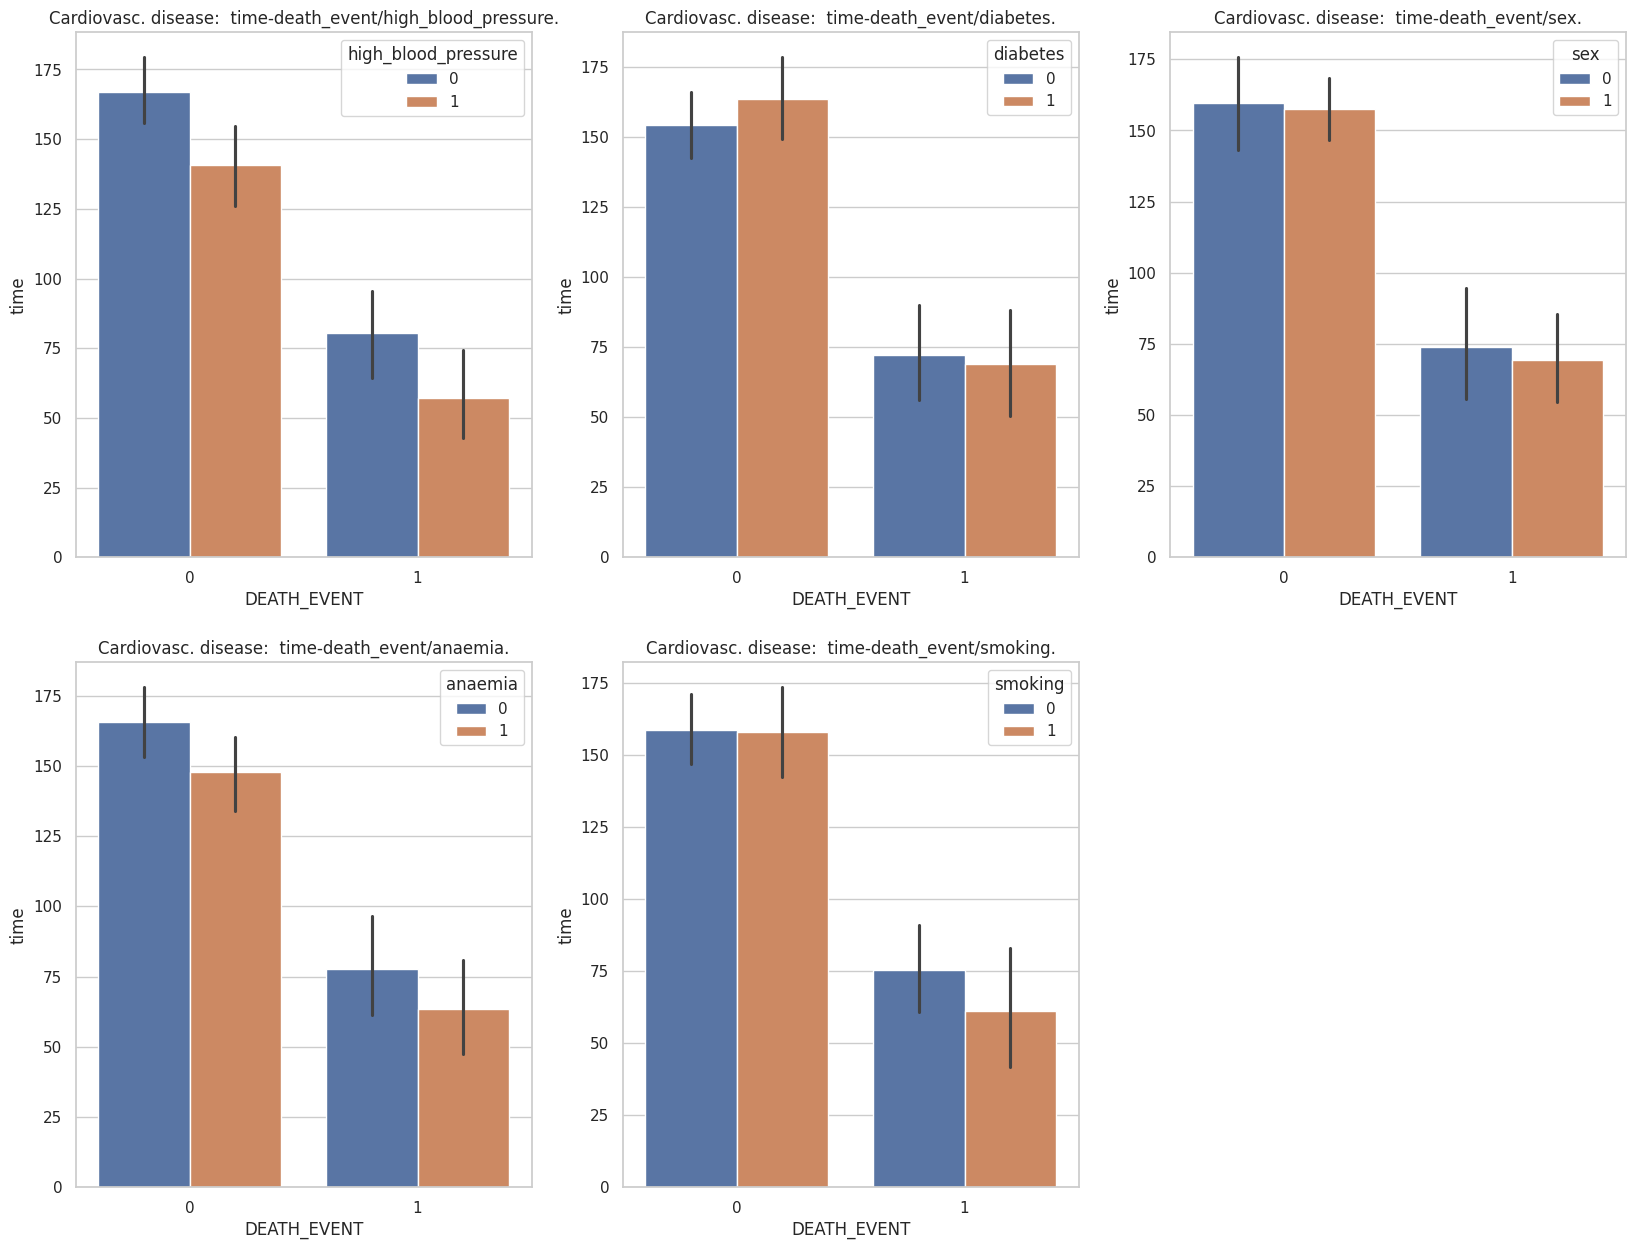

In [ ]:
multibarplot('time')

In [ ]:
bool_cols = list(set(cvd.columns) - set(no_bool_cols))

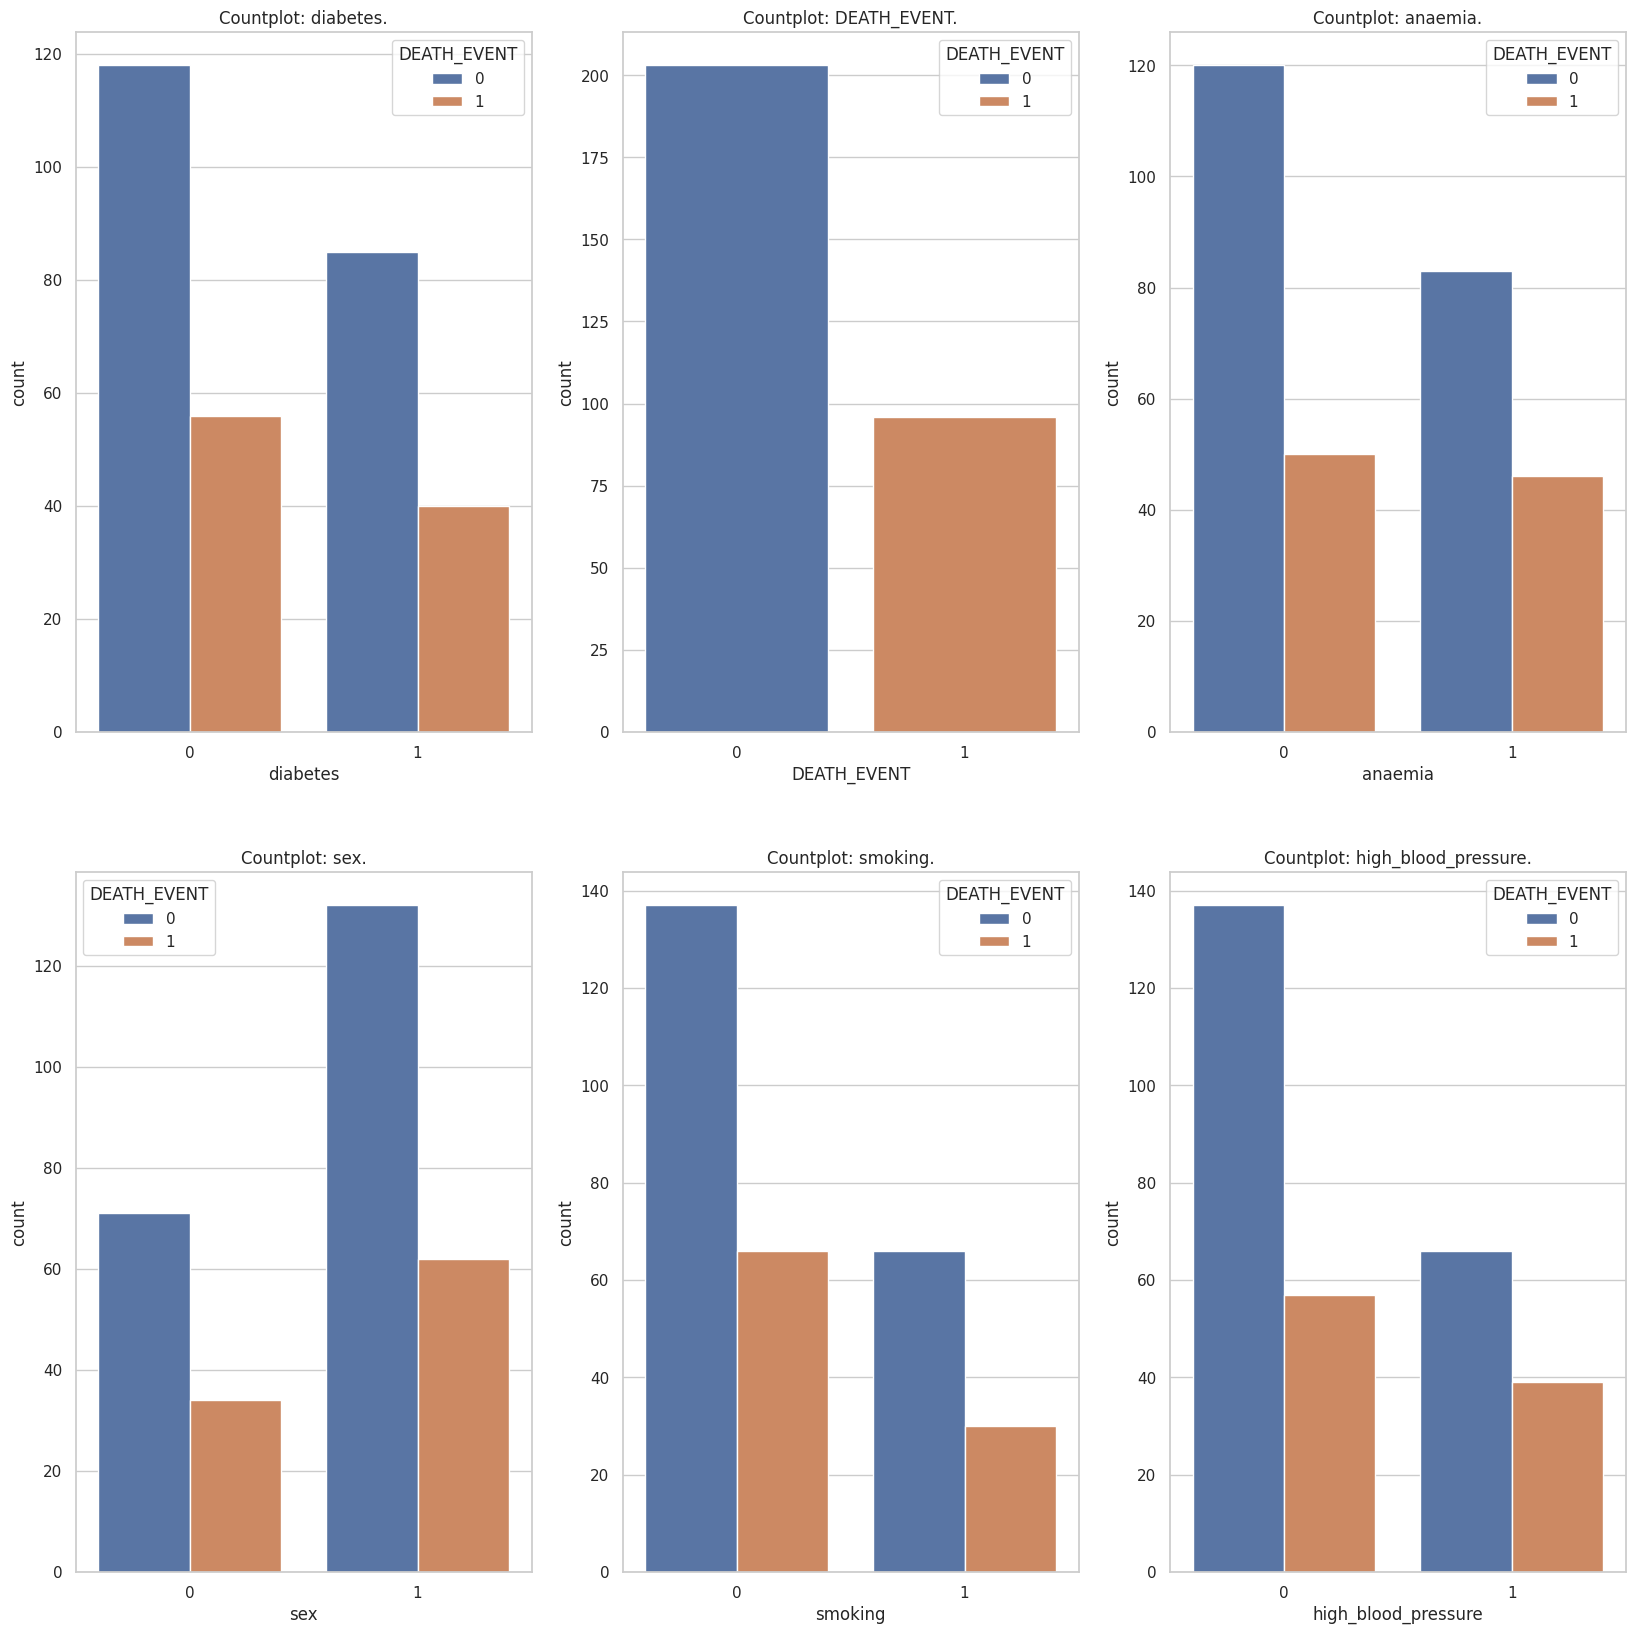

In [ ]:
countplot(bool_cols)

In [ ]:
death = cvd[cvd['DEATH_EVENT'] == 1]

In [ ]:
death.drop(columns=['DEATH_EVENT'], inplace=True)

In [ ]:
death[no_bool_cols].describe()

creatinine_phosphokinase      platelets  ejection_fraction  \
count                 96.000000      96.000000          96.000000   
mean                 670.197917  256381.044792          33.468750   
std                 1316.580640   98525.682856          12.525303   
min                   23.000000   47000.000000          14.000000   
25%                  128.750000  197500.000000          25.000000   
50%                  259.000000  258500.000000          30.000000   
75%                  582.000000  311000.000000          38.000000   
max                 7861.000000  621000.000000          70.000000   

       serum_sodium  serum_creatinine        time        age  
count     96.000000         96.000000   96.000000  96.000000  
mean     135.375000          1.835833   70.885417  65.215281  
std        5.001579          1.468562   62.378281  13.214556  
min      116.000000          0.600000    4.000000  42.000000  
25%      133.000000          1.075000   25.500000  55.000000  
50%      135.500000          1.300000   44.500000  65.000000  
75%      138.250000          1.900000  102.250000  75.000000  
max      146.000000          9.400000  241.000000  95.000000

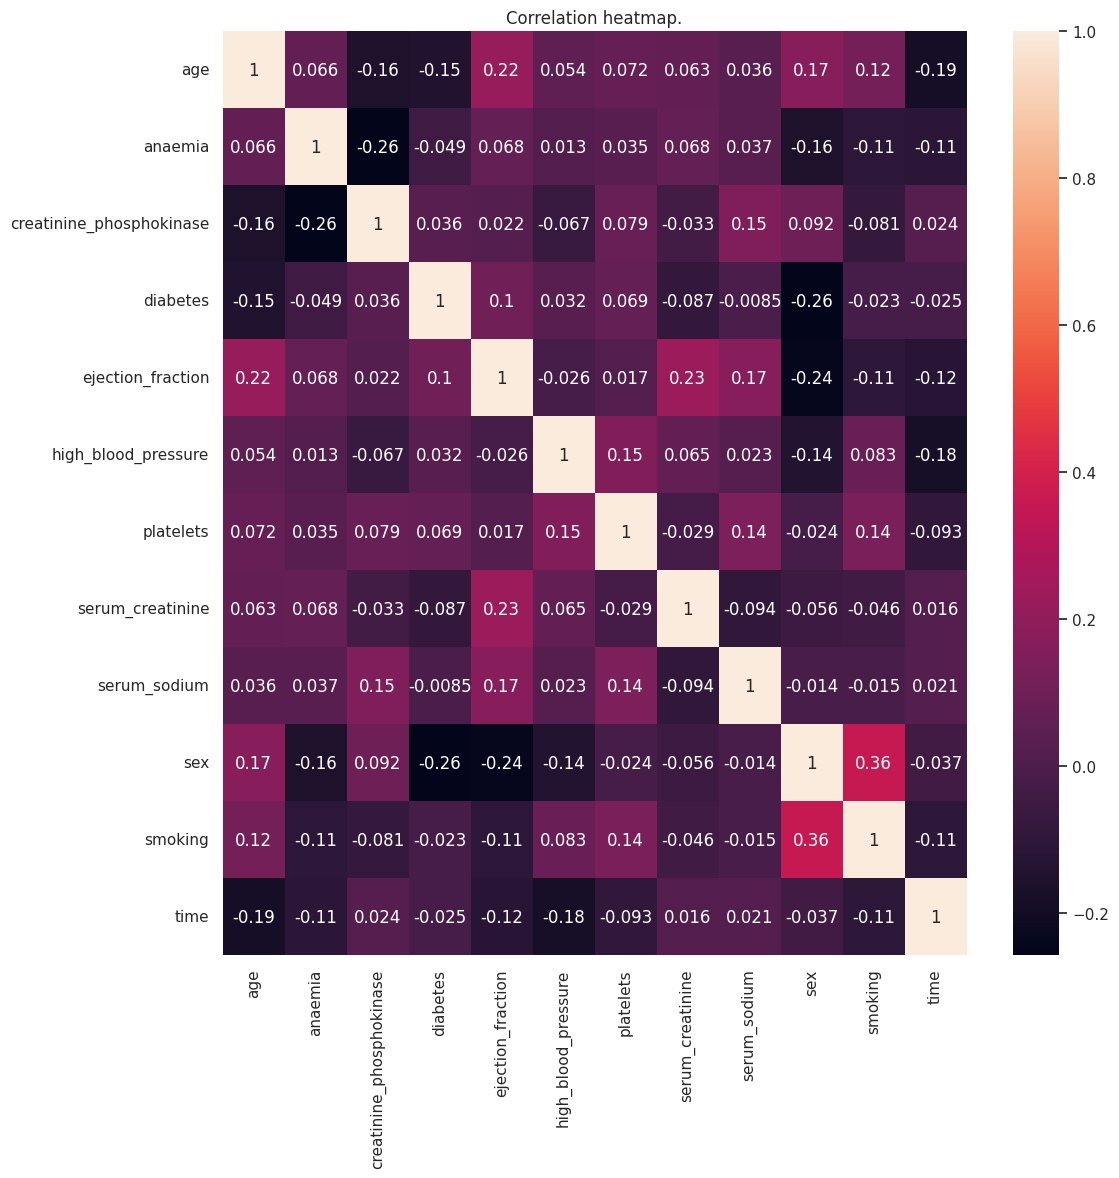

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(death.corr(), annot=True)
plt.title('Correlation heatmap.')
plt.show()

In [ ]:
def hist_death_patient(value=None, cols=no_bool_cols, data=death):
    fig= plt.figure(figsize=(20,15))
    fig.subplots_adjust(wspace=0.2, hspace=0.3)
    for i, u in enumerate(cols):
        ax = fig.add_subplot(2, 4, i+1)
        sns.histplot(x=u, data=data, hue=value, ax=ax, stat='probability', kde=True, cumulative=True)
        ax.set_title(f'Death histogram: {value}|{u}.')
    plt.show()

diabetes


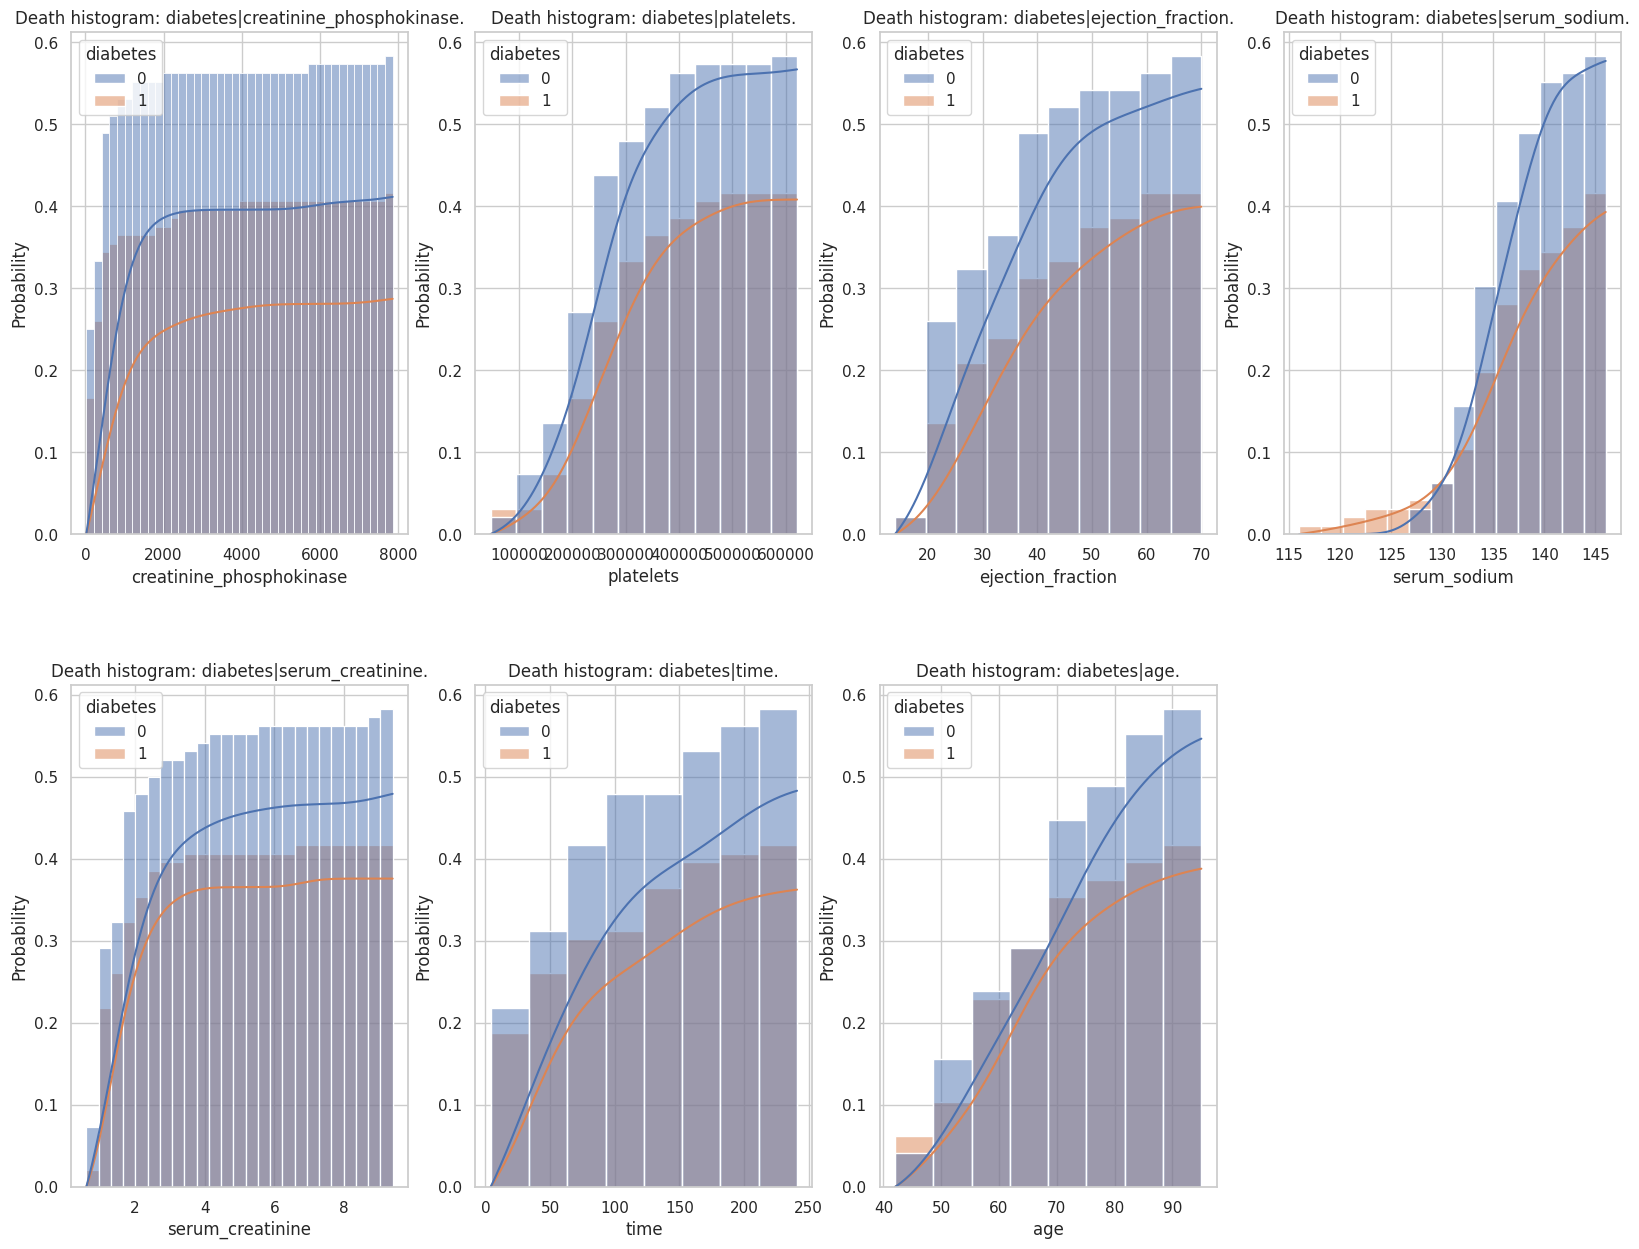

anaemia


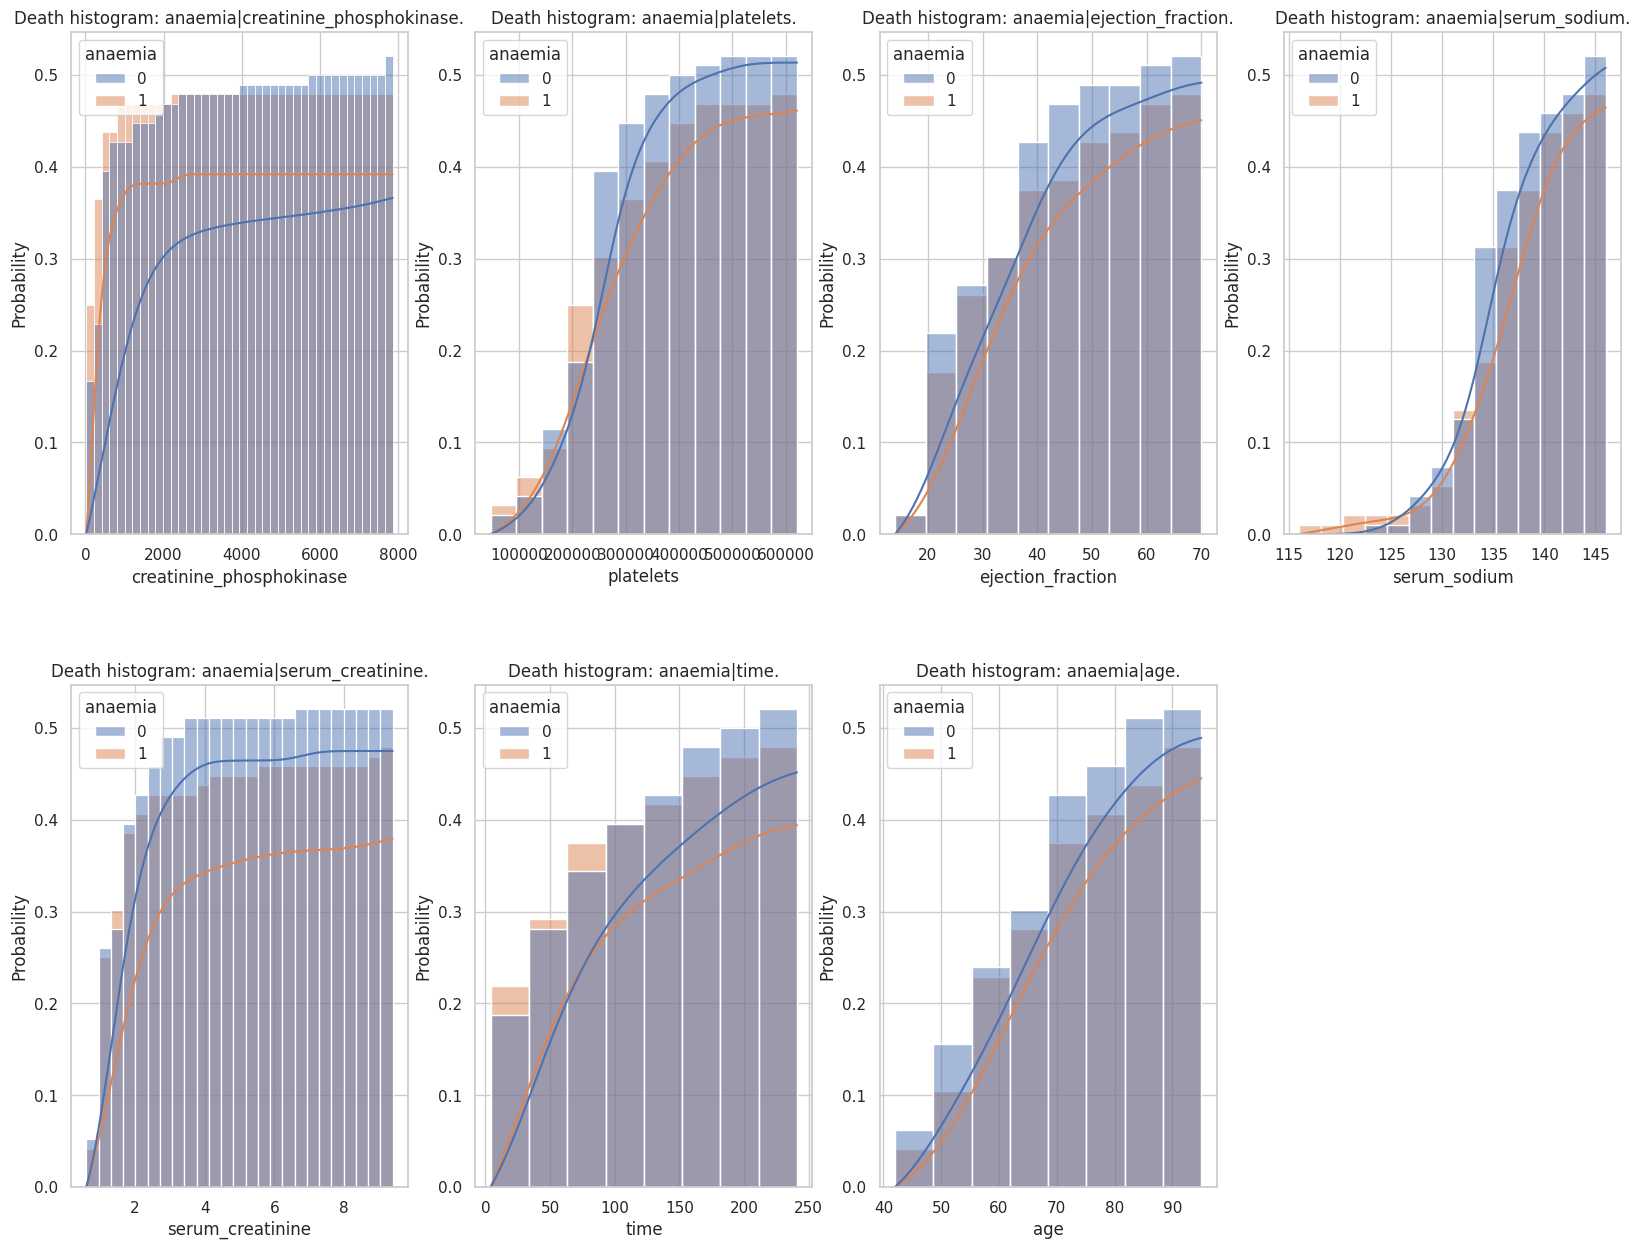

sex


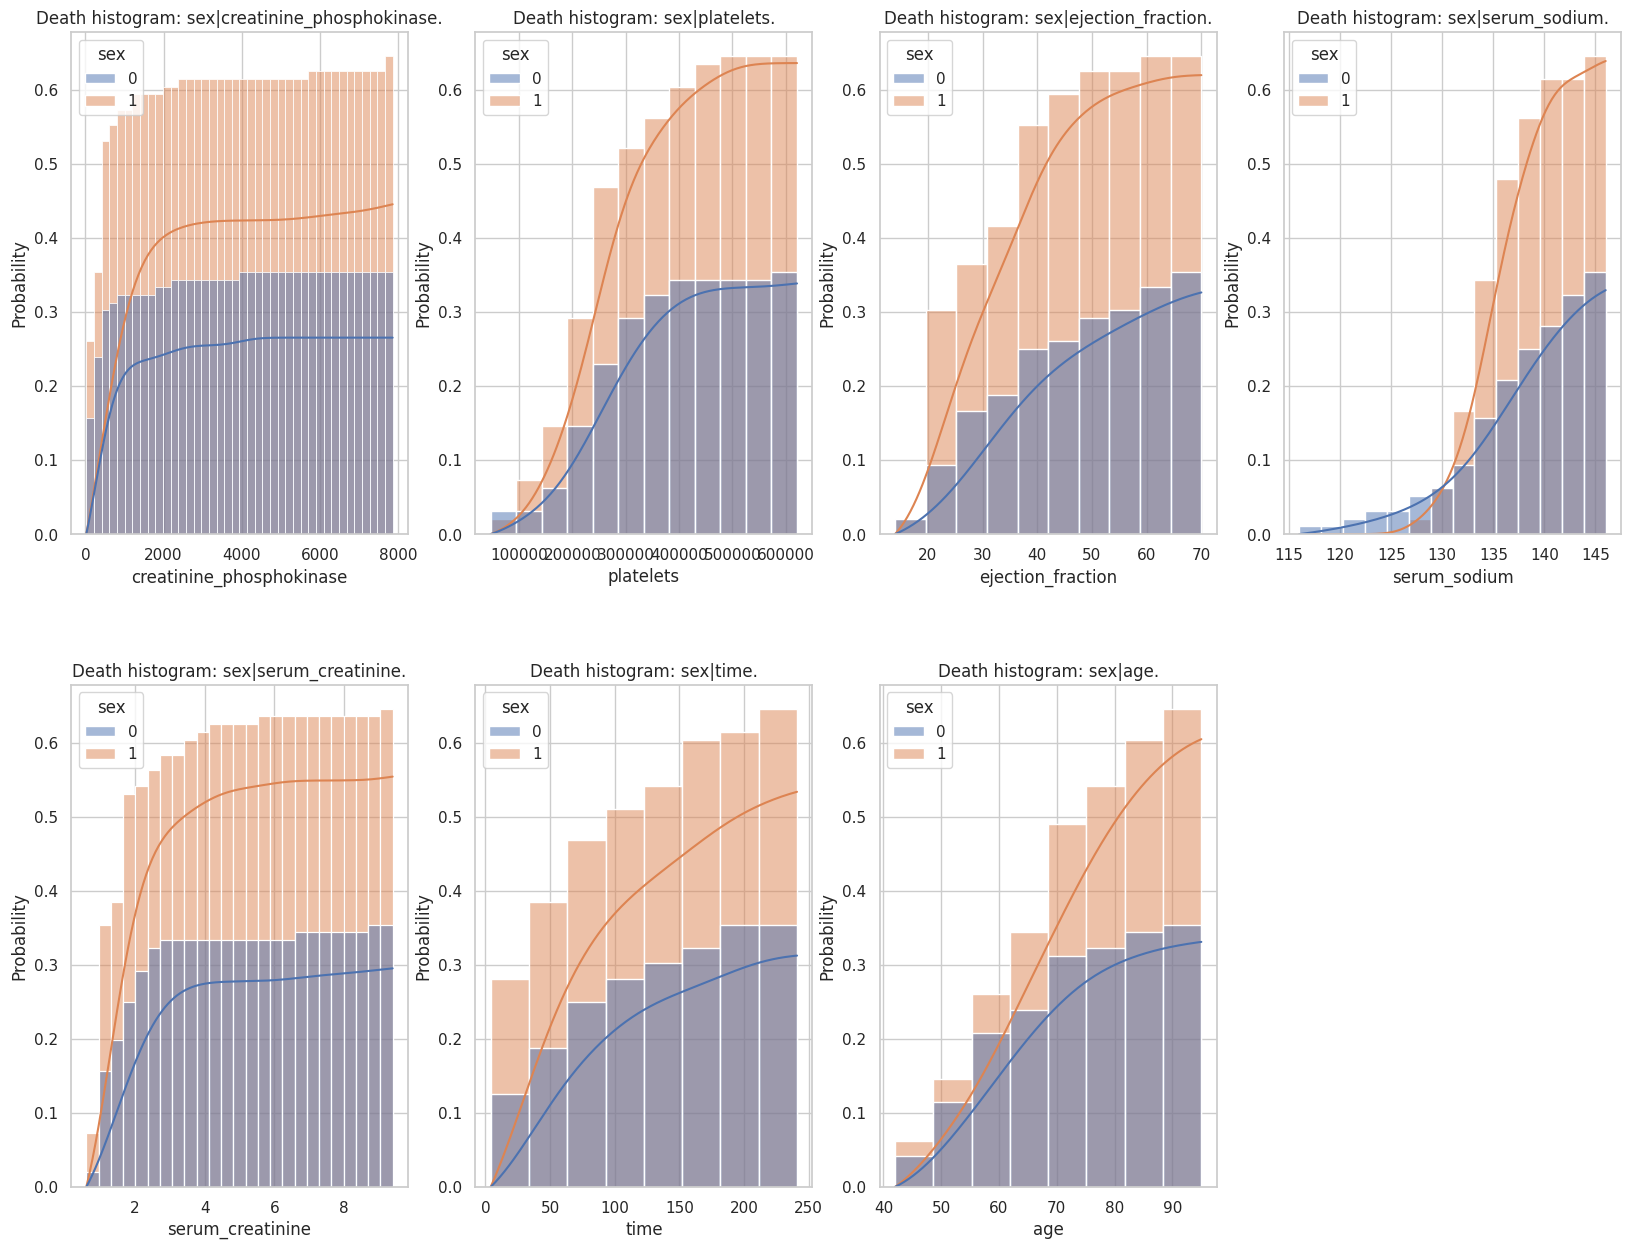

smoking


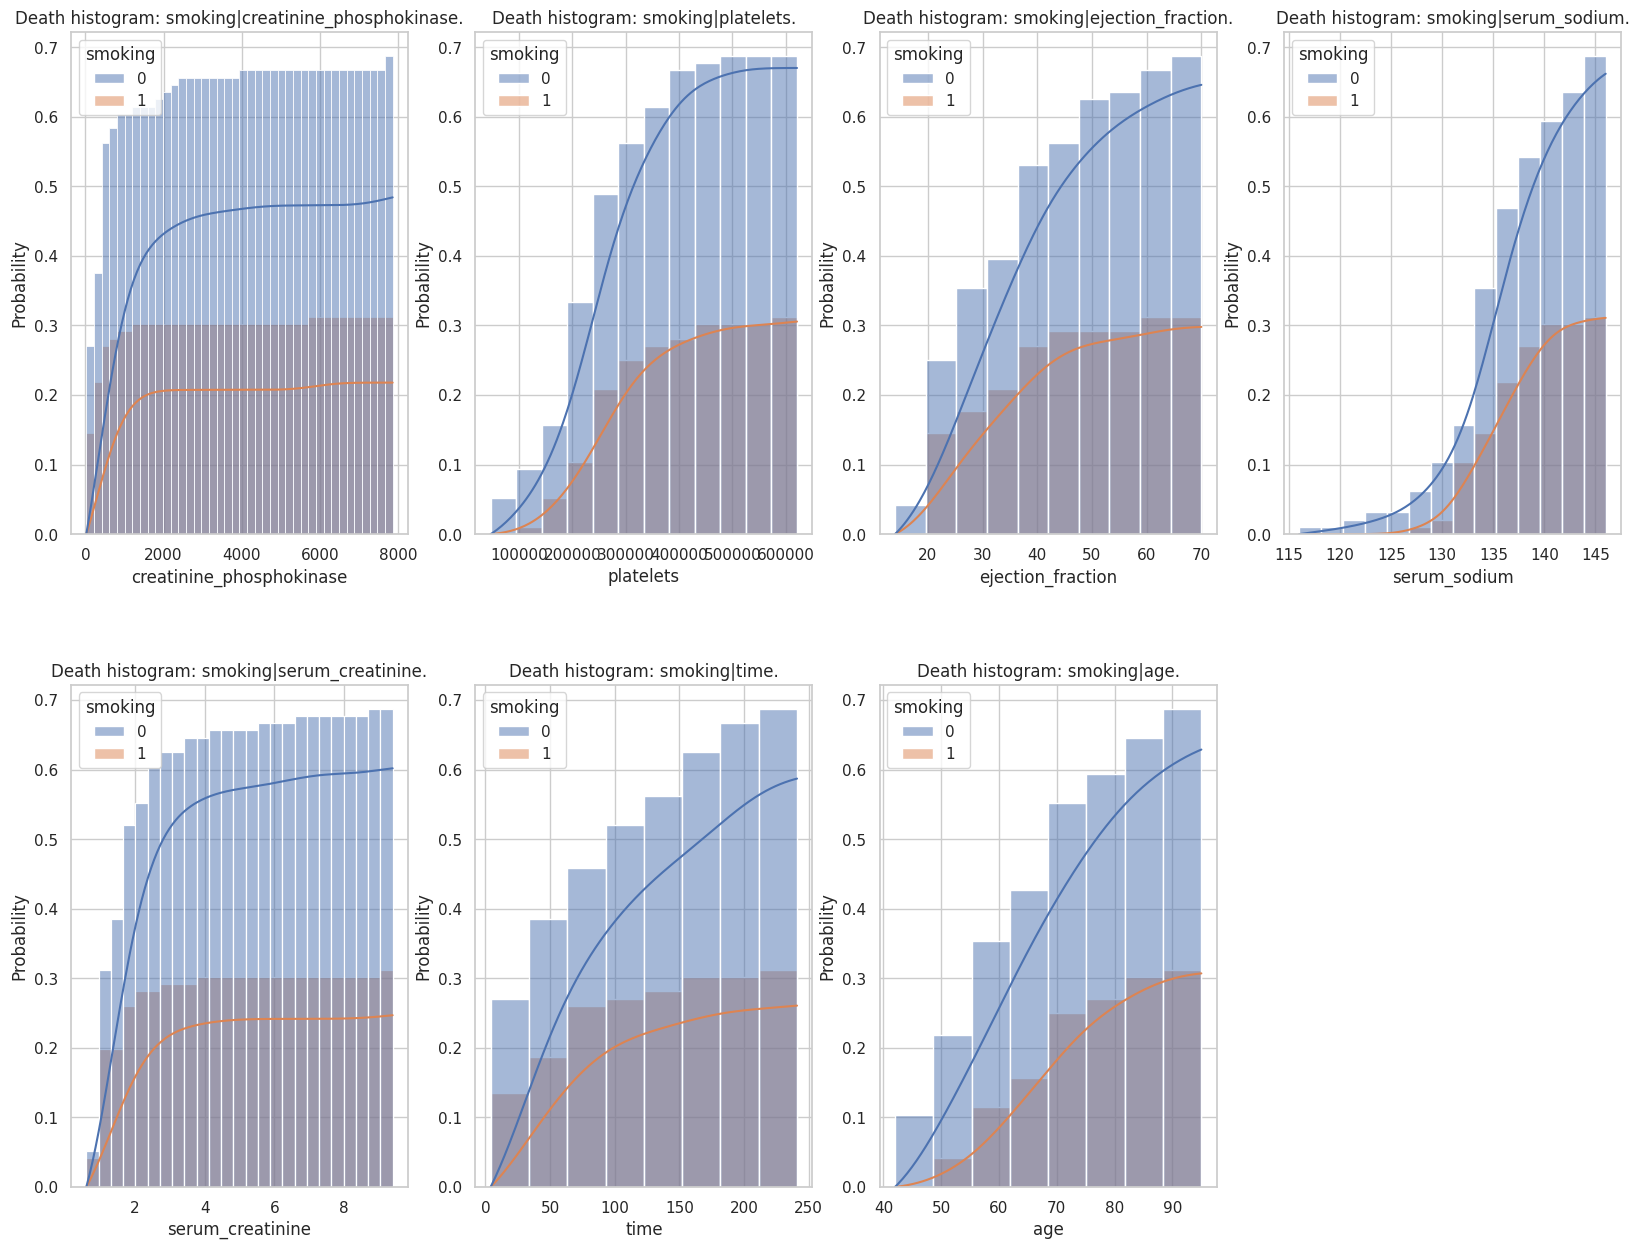

high_blood_pressure


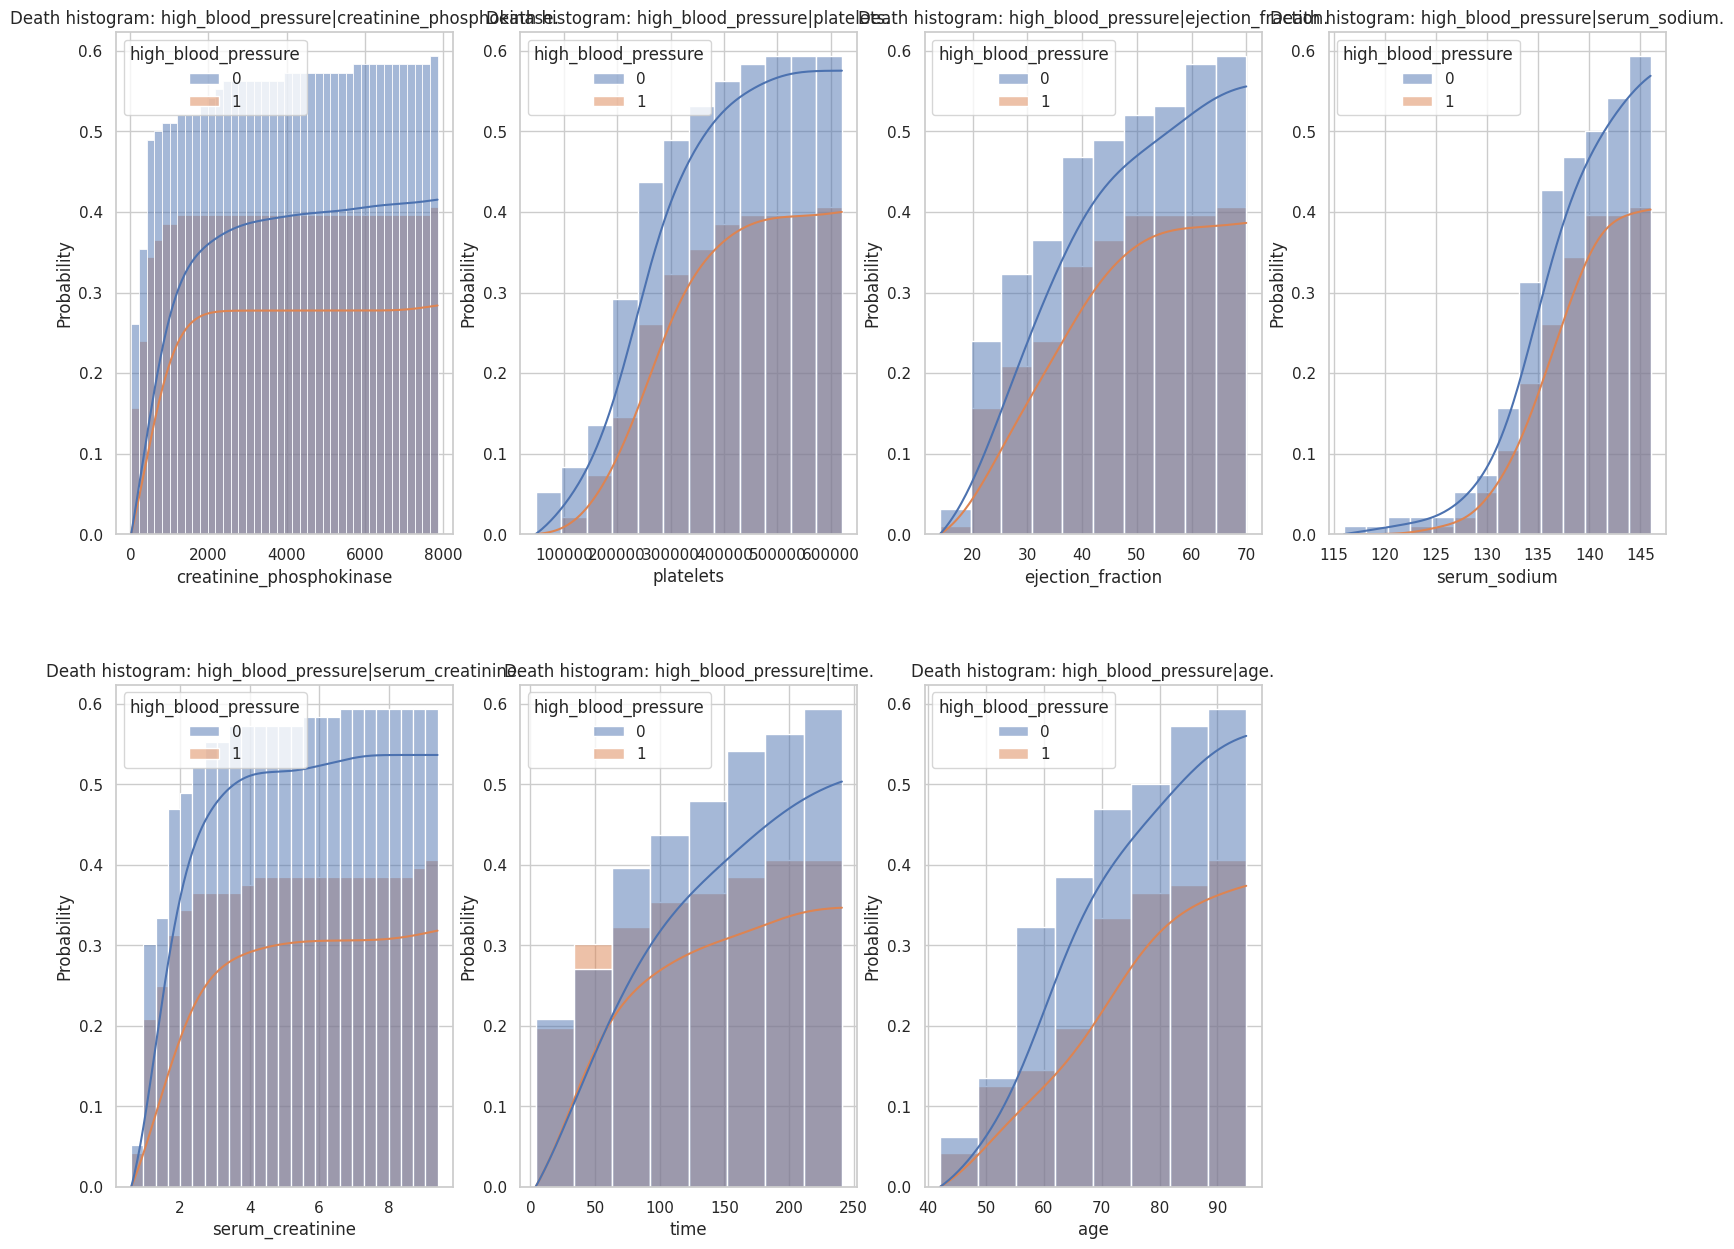

In [ ]:
for c in range(len(bool_cols)):
    if bool_cols[c] == 'DEATH_EVENT':
        continue
    print(bool_cols[c])
    hist_death_patient(value=bool_cols[c])

In [ ]:
def NormalTest(cols=no_bool_cols, data=death):
    print('In the Death cardiovascular population.\n H0: x come from a normal distribution.\n')
    norma_attr = []
    for u in cols:
        k2, p = normaltest(data[u])
        if p < 0.001:
            print(f'For {u}: The null hypothesis can be rejected. pvalue={p}')
        else:
            print(f'For {u}: The null hypothesis cannot be rejected. pvalue={p}')
            norma_attr.append(u)

    print(f'\n The attributes that come from normal process are: {norma_attr}.')
    return norma_attr

In [ ]:
 normal_cols = NormalTest()

In the Death cardiovascular population.
 H0: x come from a normal distribution.

For creatinine_phosphokinase: The null hypothesis can be rejected. pvalue=1.06758875232229e-25
For platelets: The null hypothesis cannot be rejected. pvalue=0.004876523292516175
For ejection_fraction: The null hypothesis cannot be rejected. pvalue=0.0066182733411390155
For serum_sodium: The null hypothesis can be rejected. pvalue=0.00072544971629459
For serum_creatinine: The null hypothesis can be rejected. pvalue=2.714886158316834e-21
For time: The null hypothesis can be rejected. pvalue=0.000620382184129301
For age: The null hypothesis cannot be rejected. pvalue=0.10803960470838643

 The attributes that come from normal process are: ['platelets', 'ejection_fraction', 'age'].


In [ ]:
def plot_curve(data=None, label=None):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    ax1.plot(sorted(data)[::-1], 'o')
    ax1.set_xlabel('Patient')
    ax1.set_ylabel(label)
    ax1.set_title(label)
    sns.histplot(data, stat='probability', kde=True, ax=ax2)
    ax2.set_xlabel(label)
    ax2.set_ylabel('Probability')
    ax2.set_title('Probability distribution function.')

In [ ]:
def multiscatterplot(column=None, cols=None, data=None, label=None):
    fig= plt.figure(figsize=(15,10))
    fig.subplots_adjust(wspace=0.2, hspace=0.2)
    cols = list(set(cols) - set([column]))
    for i, u in enumerate(cols):
        ax = fig.add_subplot(2,3, i+1)
        sns.scatterplot(x=column, y=u, data=cvd, hue=label)
        ax.set_title(f'scatter: {column}-{u}.')
    plt.show()

In [ ]:
death['platelets_less_255300'] = death['platelets'].apply(lambda x: 'yes' if x < 255300 else 'no')

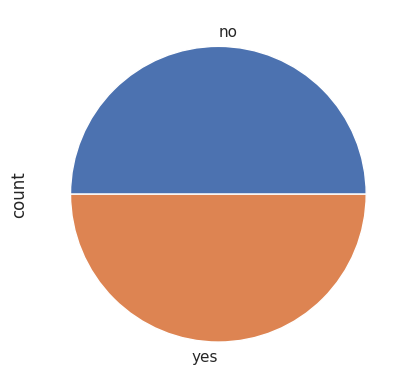

In [ ]:
death['platelets_less_255300'].value_counts().plot(kind='pie')
plt.show()

In [ ]:
(death['platelets_less_255300'].value_counts()/sum(death['platelets_less_255300'].value_counts()))*100

platelets_less_255300
no     50.0
yes    50.0
Name: count, dtype: float64

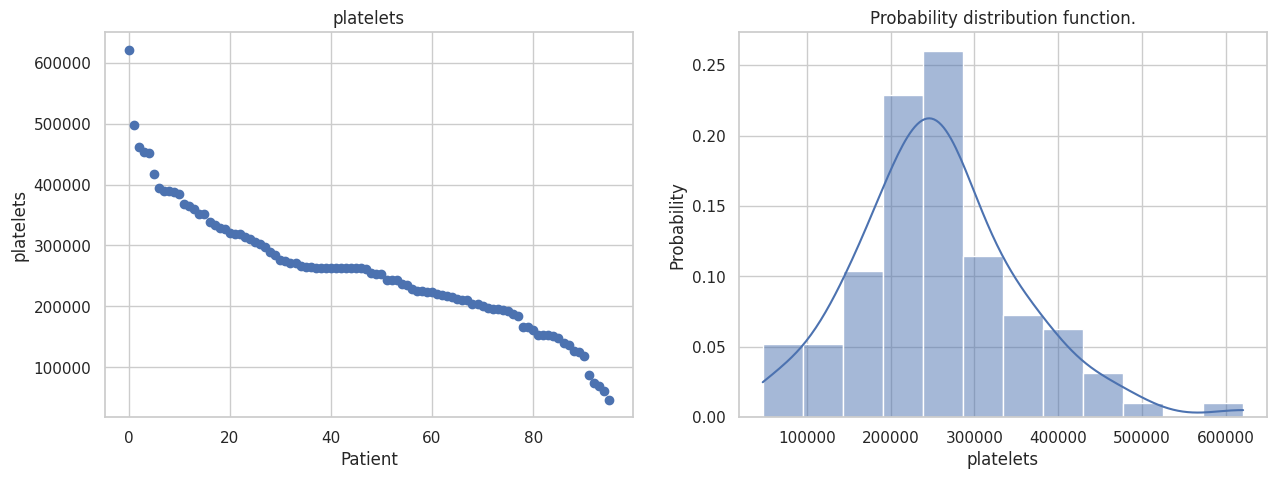

In [ ]:
plot_curve(data=death['platelets'], label='platelets')

In [ ]:
def condition(x):
    if (x>= 50 and x <= 70):
        return 'normal'
    elif (x>= 41 and x <= 49):
        return 'bordeline'
    else:
        return 'reduced'
death['EF_decision'] = death['ejection_fraction'].apply(condition)

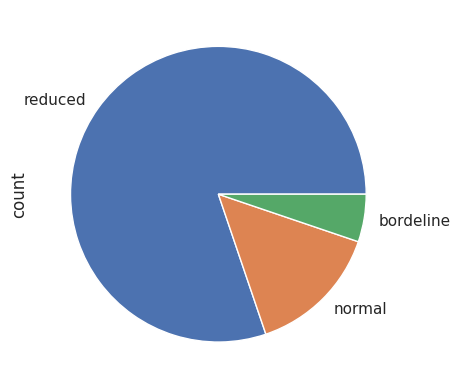

In [ ]:
death['EF_decision'].value_counts().plot(kind='pie')
plt.show()

In [ ]:
(death['EF_decision'].value_counts()/sum(death['EF_decision'].value_counts()))*100

EF_decision
reduced      80.208333
normal       14.583333
bordeline     5.208333
Name: count, dtype: float64

In [ ]:
death_patient_with_normal_EF = death[death['EF_decision'] == 'normal']

In [ ]:
pol = []
for _, u in enumerate(bool_cols):
    if u == 'DEATH_EVENT':
        continue
    v = death_patient_with_normal_EF[u].value_counts()
    pol.append((v/sum(v))*100)

In [ ]:
pd.DataFrame(pol)

1          0
count  57.142857  42.857143
count  64.285714  35.714286
count  35.714286  64.285714
count  14.285714  85.714286
count  28.571429  71.428571

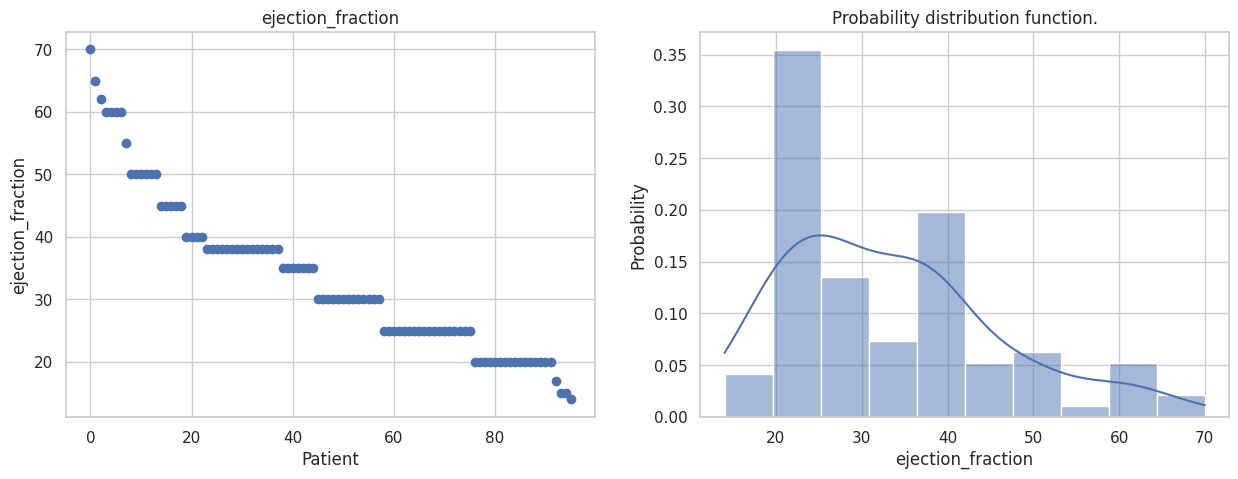

In [ ]:
plot_curve(data=death['ejection_fraction'], label='ejection_fraction')

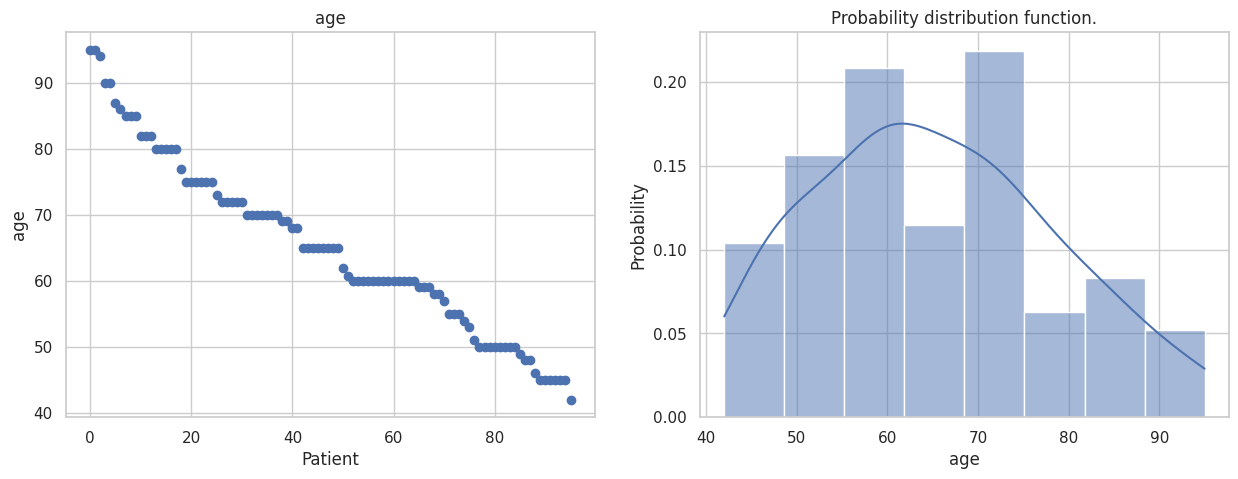

In [ ]:
plot_curve(data=death['age'], label='age')

In [ ]:
num_cols = list(set(no_bool_cols) - set(normal_cols))
num_cols

['creatinine_phosphokinase', 'serum_sodium', 'serum_creatinine', 'time']

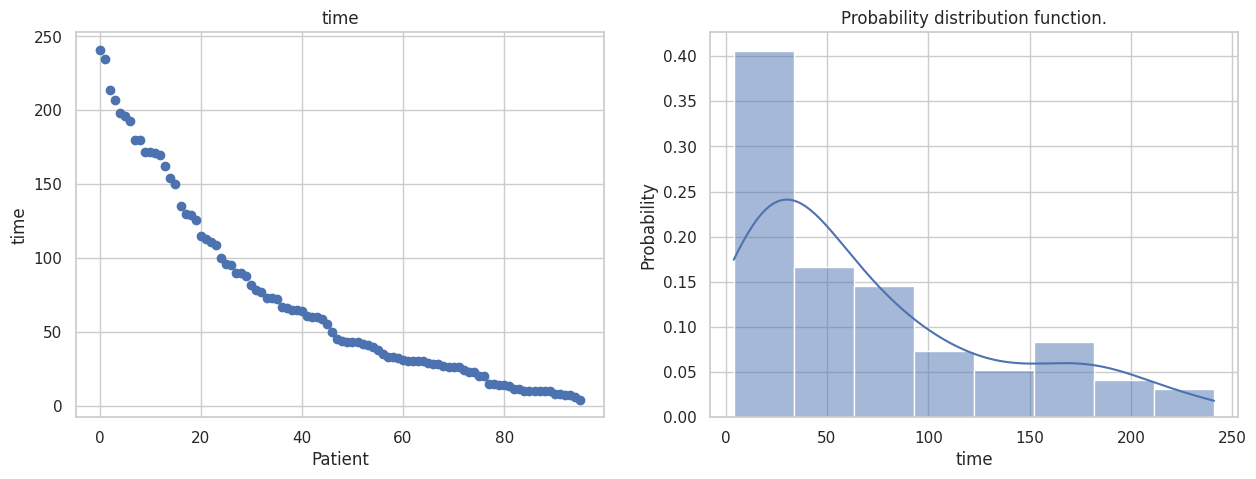

In [ ]:
plot_curve(data=death['time'], label='time')

In [ ]:
followUP_less75D = death[death['time'] < 75]

In [ ]:
def timeLess75D_histogram(r):
    fig= plt.figure(figsize=(20,10))
    fig.subplots_adjust(wspace=0.2, hspace=0.3)
    cols = ['creatinine_phosphokinase', 'platelets', 'ejection_fraction', 'serum_sodium',
        'serum_creatinine', 'age']

    for i, u in enumerate(cols):
        ax = fig.add_subplot(2, 3, i+1)
        sns.histplot(x=u, data=followUP_less75D, hue=r, ax=ax, bins=10, kde=True)
        ax.set_title(f'Time < 75 days: {u}.')
    plt.show()

The total cardiovasc. patient die with time < 75 days = 63/96.

Time < 75 days: diabetes.


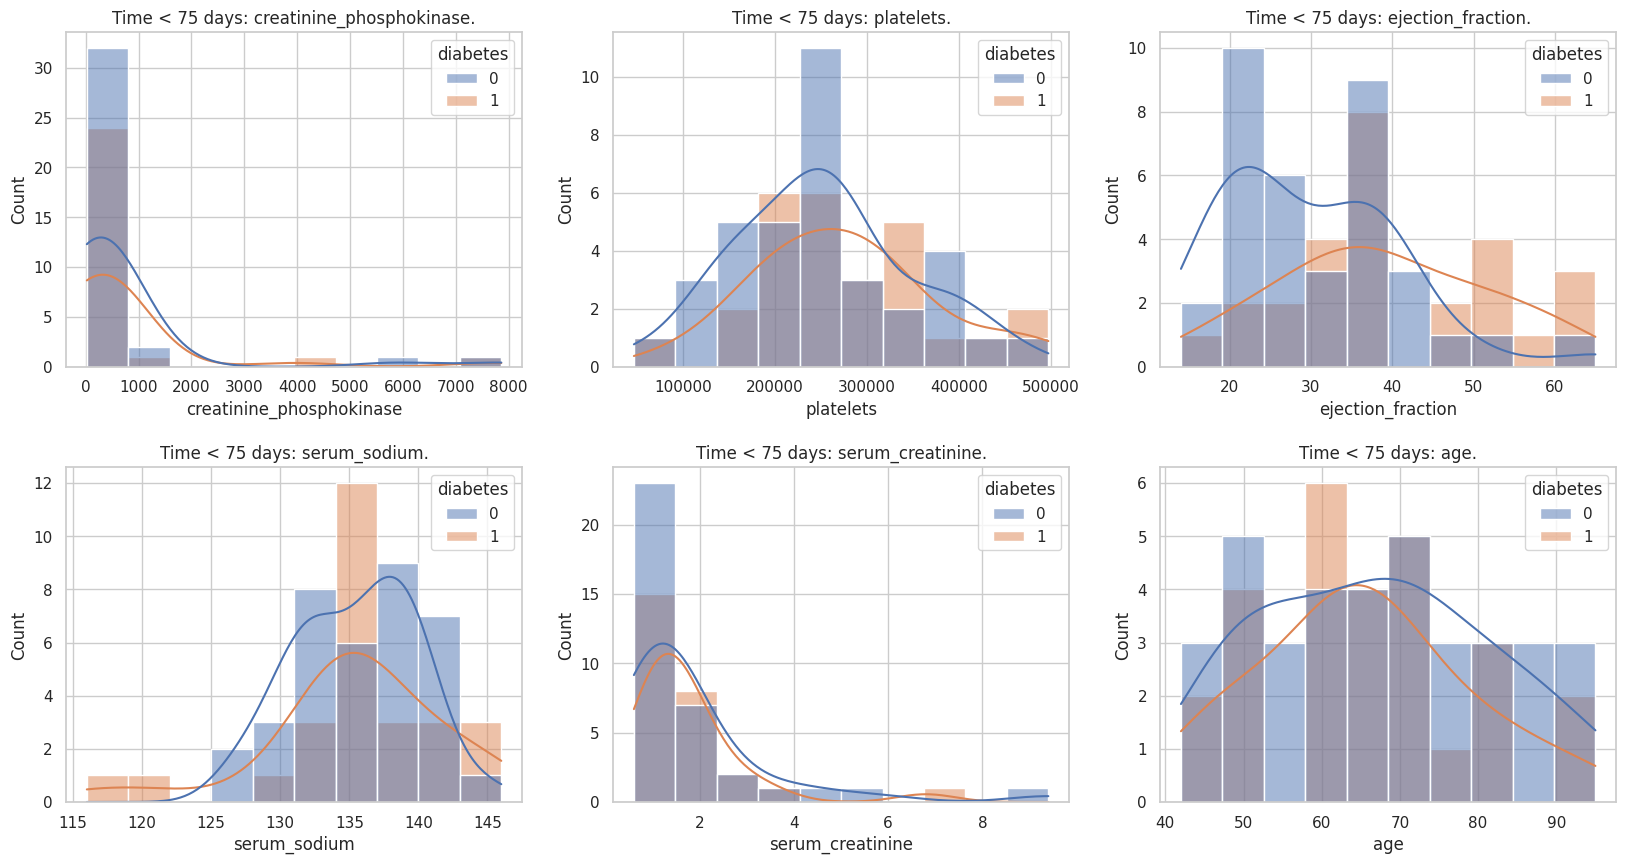


Time < 75 days: anaemia.


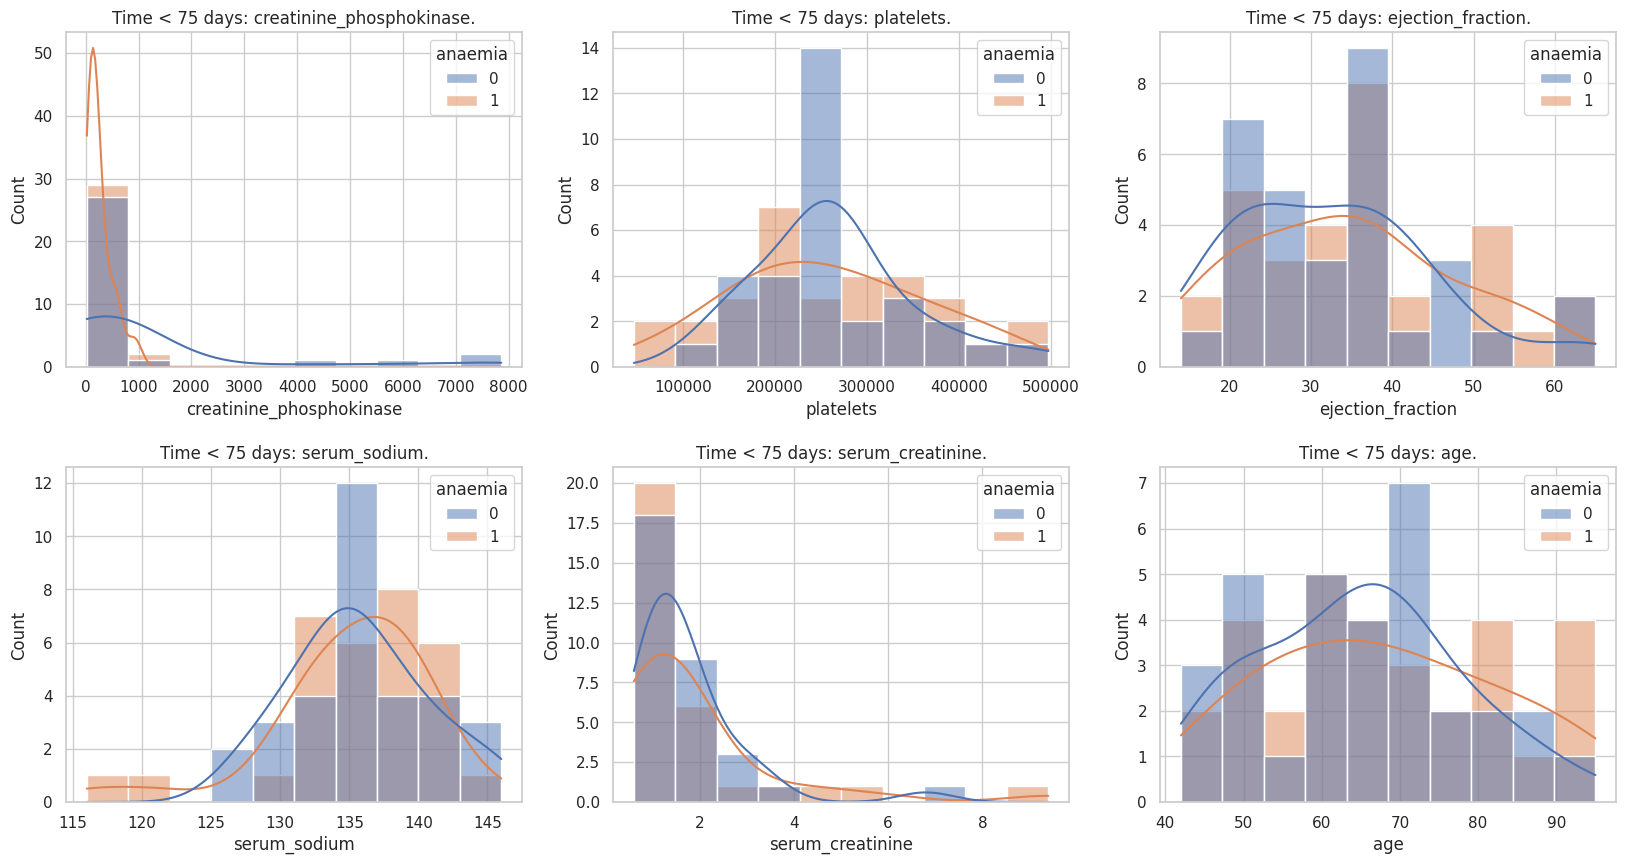


Time < 75 days: sex.


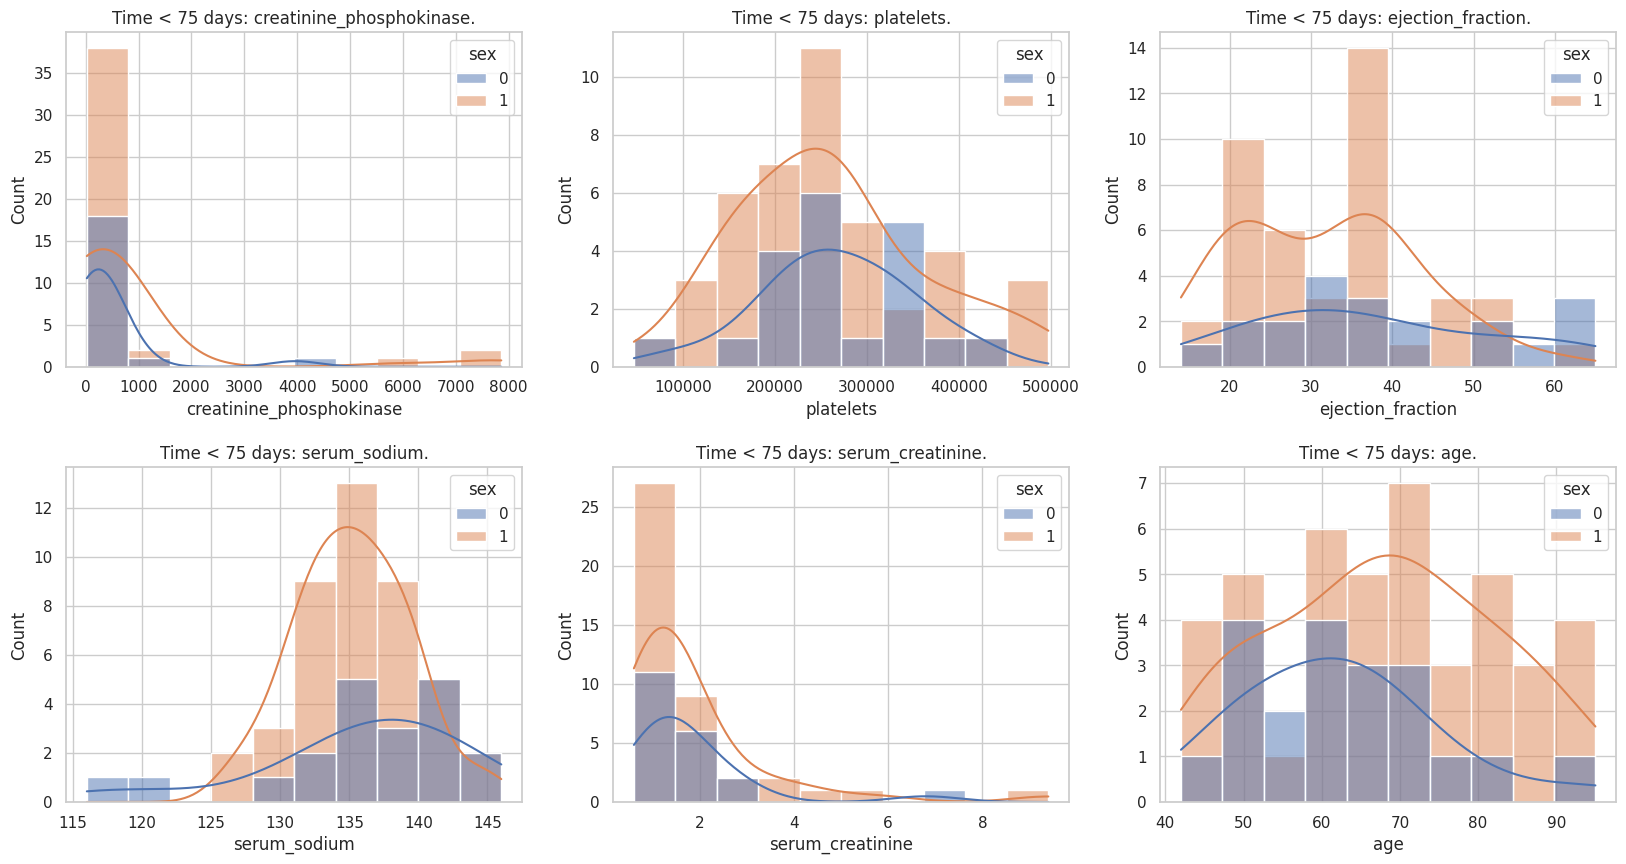


Time < 75 days: smoking.


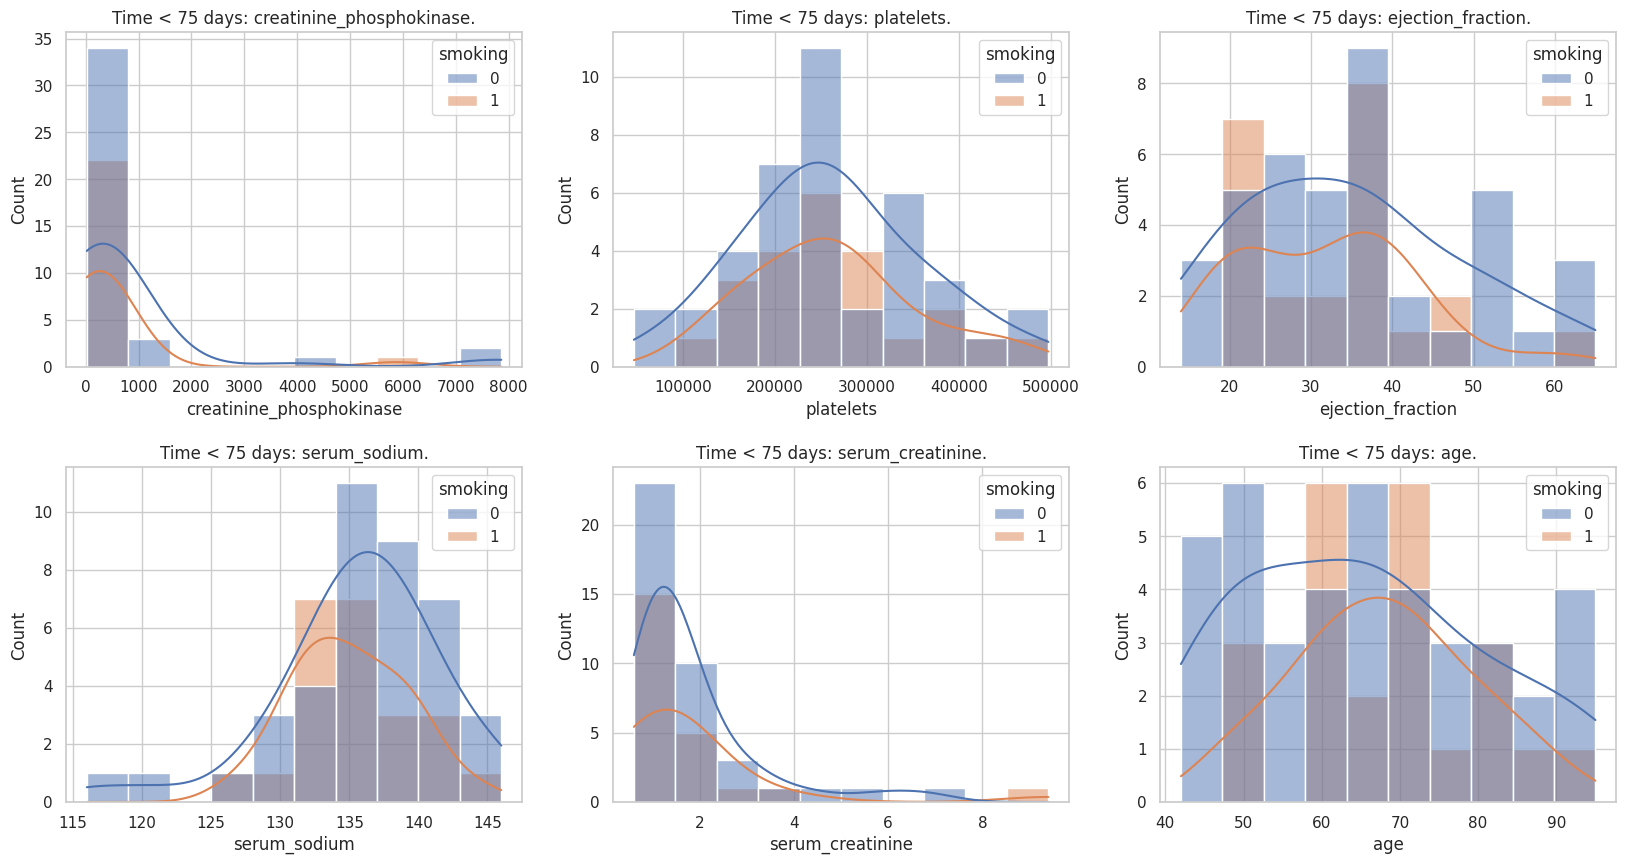


Time < 75 days: high_blood_pressure.


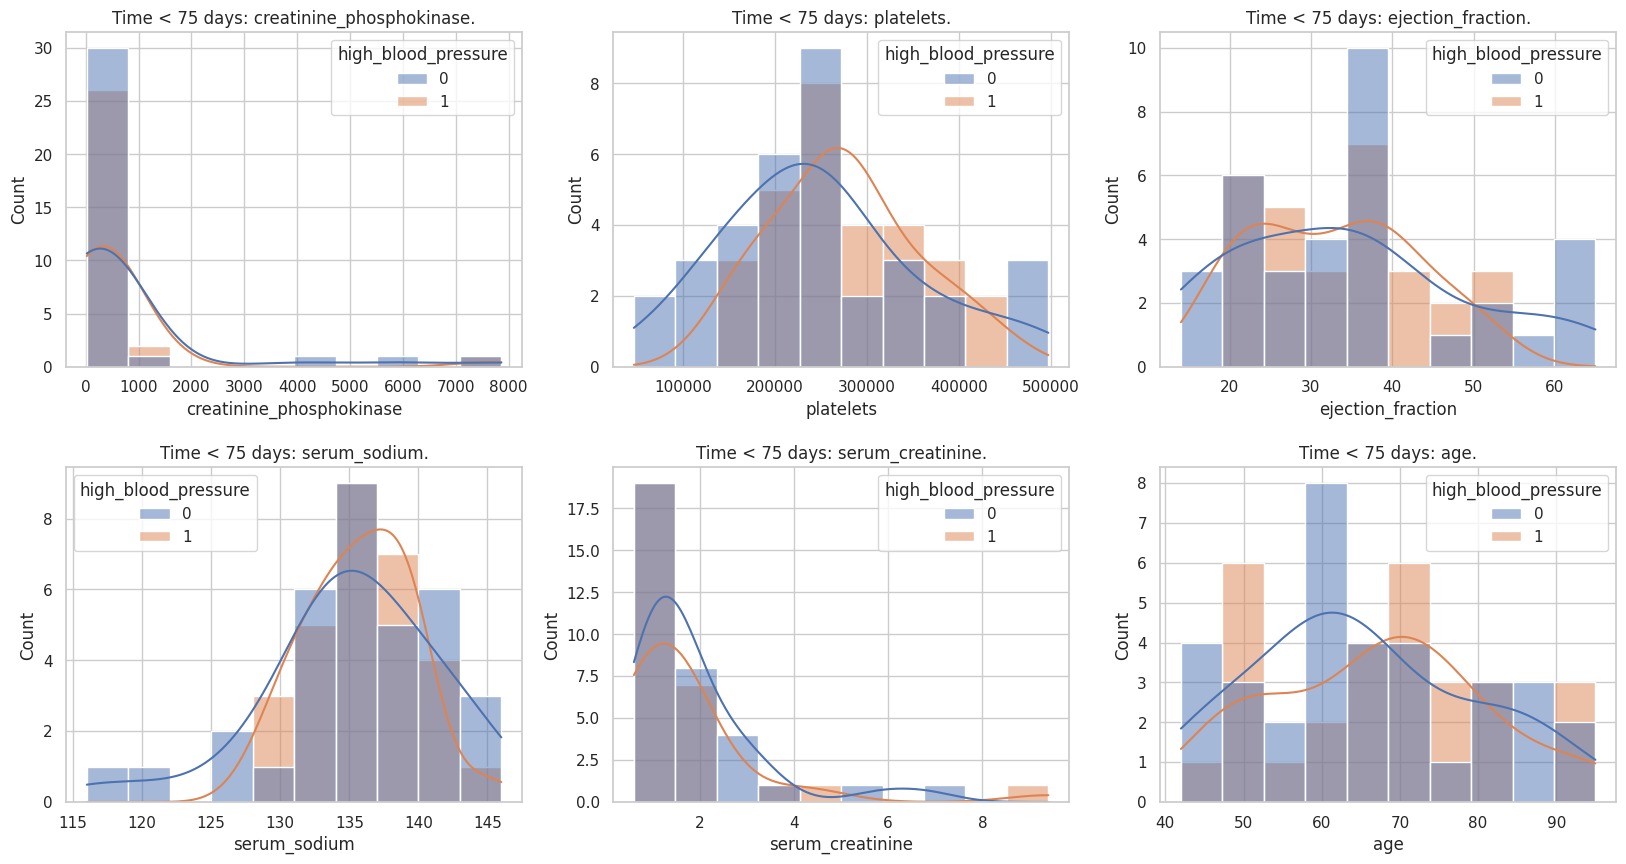

In [ ]:
print(f'The total cardiovasc. patient die with time < 75 days = {len(followUP_less75D)}/{len(death)}.\n')
for  k in bool_cols:
    if k == 'DEATH_EVENT':
        continue

    print(f'Time < 75 days: {k}.')

    timeLess75D_histogram(k)
    print()

In [ ]:
class tools:
    """
    This class contains all function for classification where target are unbalanced.
    """

    def __init__(self, xtrain=None, ytrain=None):
        self.xtrain = xtrain # train data
        self.ytrain = ytrain # train target data

        # list of different learner for classification
        self.clas_model = {'KNeighborsClassifier': KNeighborsClassifier(),
                'RandomForestClassifier': RandomForestClassifier(random_state=42),
                'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42),
                'XGBoostClassifier': XGBRFClassifier(random_state=42, eval_metric='logloss'),
                'AdaboostClassifier': AdaBoostClassifier(random_state=42),
                'ExtraTreesClassifier': ExtraTreesClassifier(random_state=42),
                'MLPClassifier':MLPClassifier(random_state=42),
                'LogisticRegression': LogisticRegression(random_state=42),
                'RidgeClassifier': RidgeClassifier(random_state=42),
                'SVC': SVC(random_state=42),
                'LinearSVC': LinearSVC(random_state=42),
                'DecisionTree': DecisionTreeClassifier(random_state=42),
                'GaussianNB': GaussianNB()}

    def classification_learner_selection(self):

        """
            This function compute differents score measure like cross validation,
            auc, accuracy, recall, precision and f1.
            reg_model: dictionary type containing different model algorithm.
        """

        result = {}
        matrix = []

        #

        # we take each classification model
        for cm in list(self.clas_model.items()):

            name = cm[0] #name of learner
            model = cm[1] # learner

            pipe = Pipeline([('smoteenn', SMOTEENN(random_state=42)),
                            (name, model)])

            cvs = cross_validate(pipe, self.xtrain, self.ytrain, cv=10,scoring='roc_auc',
                                return_train_score=True, return_estimator=True,
                                n_jobs=-1)

            ypred = cross_val_predict(pipe, self.xtrain, self.ytrain, cv=10) #prediction cv
            report = classification_report(self.ytrain, ypred)

            cvs_mean = cvs['test_score'].mean() #mean of cv score
            cvs_std = cvs['test_score'].std() #std of cv score

            result[name] = {'cvs_ROC_AUC': cvs_mean, 'report': report}

            print(f'{name} model done; score mean +/- std. dev: {round(cvs_mean, 3)} +/- {round(cvs_std, 3)} !!!')

        return result

In [ ]:
target  = cvd['DEATH_EVENT']
data = cvd.drop(columns=['time', 'DEATH_EVENT'])

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(data, target, stratify=target,
                                                random_state=42,
                                                test_size=0.2)

In [ ]:
#scaling
scaler = RobustScaler()

In [ ]:
xtrain_scaled = scaler.fit_transform(xtrain)

In [ ]:
xtest_scaled = scaler.transform(xtest)

In [ ]:
toolModel = tools(xtrain_scaled, ytrain)

In [ ]:
res = toolModel.classification_learner_selection()

KNeighborsClassifier model done; score mean +/- std. dev: 0.7 +/- 0.075 !!!
RandomForestClassifier model done; score mean +/- std. dev: 0.777 +/- 0.08 !!!
GradientBoostingClassifier model done; score mean +/- std. dev: 0.784 +/- 0.076 !!!
XGBoostClassifier model done; score mean +/- std. dev: 0.804 +/- 0.061 !!!
AdaboostClassifier model done; score mean +/- std. dev: 0.761 +/- 0.098 !!!
ExtraTreesClassifier model done; score mean +/- std. dev: 0.733 +/- 0.122 !!!
MLPClassifier model done; score mean +/- std. dev: 0.741 +/- 0.101 !!!
LogisticRegression model done; score mean +/- std. dev: 0.767 +/- 0.101 !!!
RidgeClassifier model done; score mean +/- std. dev: 0.715 +/- 0.104 !!!
SVC model done; score mean +/- std. dev: 0.788 +/- 0.1 !!!
LinearSVC model done; score mean +/- std. dev: 0.761 +/- 0.107 !!!
DecisionTree model done; score mean +/- std. dev: 0.714 +/- 0.108 !!!
GaussianNB model done; score mean +/- std. dev: 0.717 +/- 0.106 !!!


In [ ]:
pd.DataFrame(res).iloc[0,:].sort_values(ascending=False)

XGBoostClassifier             0.803827
SVC                           0.787605
GradientBoostingClassifier    0.784283
RandomForestClassifier        0.776582
LogisticRegression            0.766708
LinearSVC                     0.761121
AdaboostClassifier            0.760898
MLPClassifier                 0.740632
ExtraTreesClassifier          0.732776
GaussianNB                    0.717266
RidgeClassifier               0.715113
DecisionTree                  0.713892
KNeighborsClassifier          0.700003
Name: cvs_ROC_AUC, dtype: object

In [ ]:
dcol = pd.DataFrame(res).columns
for i in range(len(dcol)):
    print(dcol[i])
    print(pd.DataFrame(res).iloc[1, i])
    print()

KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       162
           1       0.51      0.61      0.55        77

    accuracy                           0.68       239
   macro avg       0.65      0.66      0.65       239
weighted avg       0.70      0.68      0.69       239


RandomForestClassifier
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       162
           1       0.60      0.64      0.62        77

    accuracy                           0.75       239
   macro avg       0.71      0.72      0.72       239
weighted avg       0.75      0.75      0.75       239


GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       162
           1       0.59      0.61      0.60        77

    accuracy                           0.74       239
   macro avg       0.70      0.71      0.71       239
w

In [ ]:
#pipe = Pipeline([('smoteenn', SMOTEENN(random_state=42)),
 #                           ('xgboost', XGBRFClassifier(random_state=42, eval_metric='logloss'))])

In [ ]:
#param_grid = {'xgboost__learning_rate':[1, 0.1, 0.01], 'xgboost__max_depth': [3, 4, 5], 'xgboost__n_estimators':[100, 1000],
 #        'xgboost__gamma':[0.5, 1.0, 1.5], 'xgboost__subsample':[0.6, 0.8, 1], 'xgboost__colsample_bytree':[0.6, 0.8, 1]}

In [ ]:
#grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)

In [ ]:
#grid_search.fit(xtrain_scaled, ytrain)

In [ ]:
#print(f"Best parameters: {grid_search.best_params_}")
#print(f"Best cross-validation score: {grid_search.best_score_:.2f}")

In [ ]:
#print(f'Test set score: {grid_search.score(xtest_scaled, ytest)}.')

In [ ]:
learner = XGBRFClassifier(random_state=42, gamma=1.5, colsample_bytree=0.8, max_depth=3,
                                                       n_estimators=1000, subsample=0.6, eval_metric='logloss')

model = Pipeline([('smoteenn', SMOTEENN(random_state=42, )),
                            ('model',learner)])

In [ ]:
model.fit(xtrain_scaled, ytrain)

Pipeline(steps=[('smoteenn', SMOTEENN(random_state=42)),
                ('model',
                 XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                                 colsample_bylevel=None, colsample_bytree=0.8,
                                 device=None, early_stopping_rounds=None,
                                 enable_categorical=False,
                                 eval_metric='logloss', feature_types=None,
                                 gamma=1.5, grow_policy=None,
                                 importance_type=None,
                                 interaction_constraints=None, max_bin=None,
                                 max_cat_threshold=None, max_cat_to_onehot=None,
                                 max_delta_step=None, max_depth=3,
                                 max_leaves=None, min_child_weight=None,
                                 missing=nan, monotone_constraints=None,
                                 multi_strategy=None, n_estimators=1000,
                                 n_jobs=None, num_parallel_tree=None,
                                 objective='binary:logistic', random_state=42,
                                 reg_alpha=None, ...))])

In [ ]:
ypred = model.predict(xtest_scaled)

In [ ]:
print(f'ROC_AUC score: {roc_auc_score(ytest, ypred)}.')

ROC_AUC score: 0.6431322207958922.


In [ ]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.78      0.71      0.74        41
           1       0.48      0.58      0.52        19

    accuracy                           0.67        60
   macro avg       0.63      0.64      0.63        60
weighted avg       0.69      0.67      0.67        60



In [ ]:
print(f'f1 score {f1_score(ytest, ypred)}')
print(f'precision score: {precision_score(ytest, ypred)}')
print(f'recall score: {recall_score(ytest, ypred)}')
print(f'accuracy score: {accuracy_score(ytest, ypred)}')

f1 score 0.5238095238095238
precision score: 0.4782608695652174
recall score: 0.5789473684210527
accuracy score: 0.6666666666666666


In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
patient = death.drop(columns=['platelets_less_255300','EF_decision', 'time'])

In [ ]:
patient.tail()


age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
220  73.0        0                       582         0                 20   
230  60.0        0                       166         0                 30   
246  55.0        0                      2017         0                 25   
262  65.0        1                       258         1                 25   
266  55.0        0                      1199         0                 20   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
220                    0  263358.03              1.83           134    1   
230                    0   62000.00              1.70           127    0   
246                    0  314000.00              1.10           138    1   
262                    0  198000.00              1.40           129    1   
266                    0  263358.03              1.83           134    1   

     smoking  
220        0  
230        0  
246        0  
262        0  
266        1

In [ ]:
search_info = Pipeline([('scaler', RobustScaler()), ('pca', PCA(n_components=0.95))])

In [ ]:
patient_pca = search_info.fit_transform(patient)

In [ ]:
pca = search_info['pca']

In [ ]:
pca.components_.shape

(7, 11)

In [ ]:
df = pd.DataFrame(pca.components_, columns=patient.columns, index =  ['PC'+str(i) for i in range(7)])

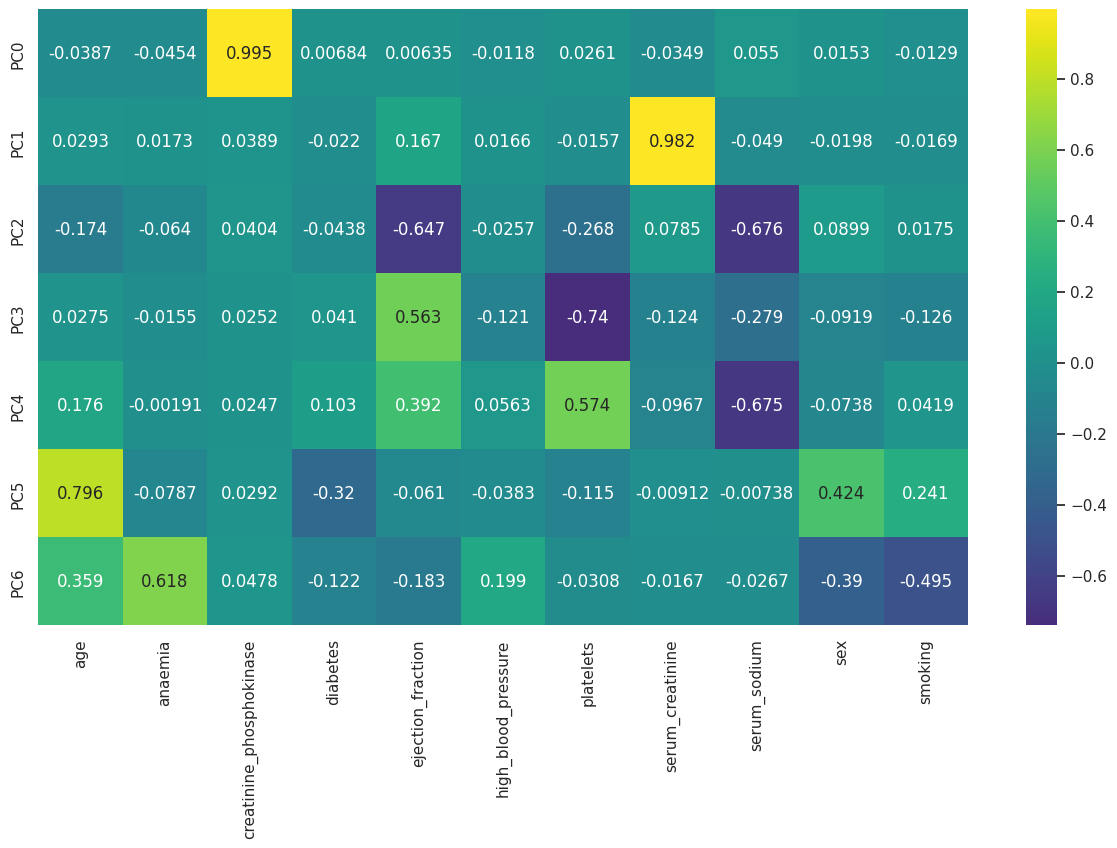

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df, annot=True, center=0, fmt='0.3g', cmap='viridis')
plt.show()

In [ ]:
patient_pc = pd.DataFrame(patient_pca, columns=['PC'+str(i) for i in range(7)])
patient_pc.shape

(96, 7)

In [ ]:
patient_pc.tail()

PC0       PC1       PC2       PC3       PC4       PC5       PC6
91 -0.194731 -0.172151  0.840838 -0.503081 -0.233685  0.623827  0.015112
92 -1.207696 -0.140152  1.692055  1.684704 -0.099445 -0.176036  0.080439
93  3.078548 -0.924693  0.172324 -0.663763 -0.335116 -0.072745 -0.246183
94 -0.976115 -0.608414  1.281324  0.466116  0.292692 -0.059232  0.315069
95  1.182267 -0.162463  1.069474 -0.619726 -0.316169  0.188089 -0.737292

In [ ]:
#create function
def visualize_decomposition(comp1=None, comp2=None, data=patient_pc):

    plt.figure(figsize=(15,5))
    sns.scatterplot(x=comp1, y=comp2, data=data)
    plt.xlabel(comp1)
    plt.ylabel(comp2)
    plt.title(f'Visualization {comp1} and {comp2}.')
    plt.show()

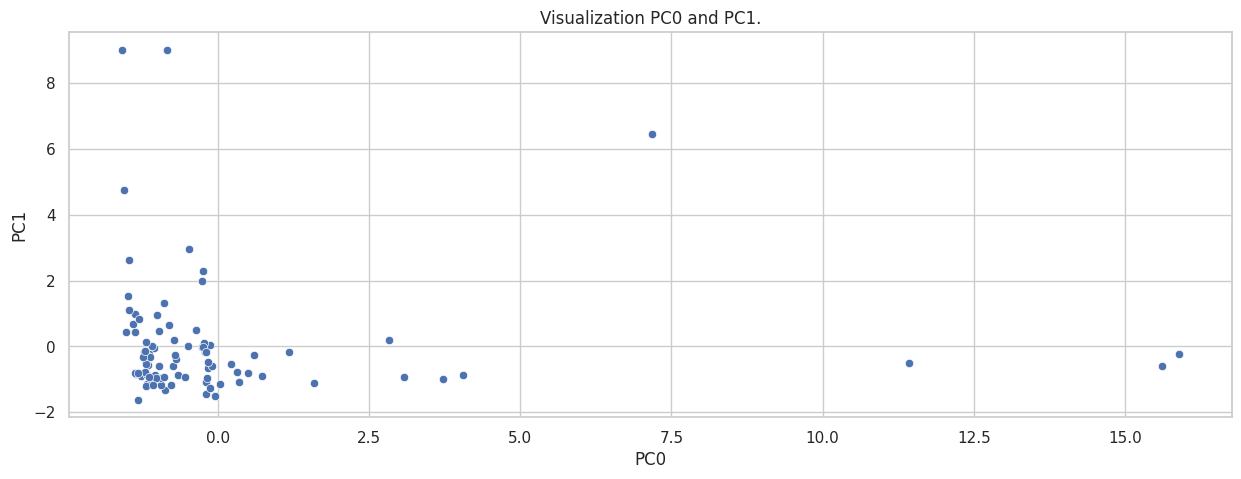

In [ ]:
visualize_decomposition(comp1='PC0', comp2='PC1')

In [ ]:
A_set = patient_pc[(patient_pc['PC0']>0) &  (patient_pc['PC1']<0)]
B_set = patient_pc[(patient_pc['PC0']<0) &  (patient_pc['PC1']>0)]
C_set = patient_pc[(patient_pc['PC0']<0) &  (patient_pc['PC1']<0)]

In [ ]:
print(f'P(A_set) = {(len(A_set)/len(patient_pc))*100}%\nP(B_set) = {(len(B_set)/len(patient_pc))*100}%',
     f'\nP(C_set) = {(len(C_set)/len(patient_pc))*100}%')

P(A_set) = 15.625%
P(B_set) = 26.041666666666668% 
P(C_set) = 56.25%
